In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 300) # specifies number of rows to show
#pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
import datetime, os, sys
import scipy as sp
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('SP 500 Data/A UN Equity.csv')

In [3]:
header = df.iloc[0]
df = df[1:]
df.rename(columns=header, inplace=True)
df = df[1:]

df.reset_index(drop=True, inplace=True)
df = df.rename(columns={'field': 'date', 'PX_LAST': 'closing_price'})

df

date   PX_Open   PX_HIGH   PX_LOW closing_price      VOLUME
0     2000-01-03   53.0594   53.1015  45.4795       48.2167   2234100.0
1     2000-01-04   45.9006   46.3638  43.6687       44.1741   2428600.0
2     2000-01-05   44.6373   44.6373  40.6368       42.0685   3097100.0
3     2000-01-06   41.5211   41.7738   39.205       39.6682   1280500.0
4     2000-01-07   39.7946   44.4267  39.7524       43.7951   1445900.0
5     2000-01-10   46.4902   46.9113  45.5216        46.448   1031300.0
6     2000-01-11    46.448    46.448  44.8057       45.8164   1022400.0
7     2000-01-12   45.8164   45.8164  43.2055       44.8899    748700.0
8     2000-01-13    46.069   46.9955  44.4688       45.5637    616200.0
9     2000-01-14   45.1426   46.7428  45.1426        46.069    700600.0
10    2000-01-18   46.2375    49.101  45.9848       48.1746   1156800.0
11    2000-01-19   48.5115   48.5115  47.0376        47.585   1586300.0
12    2000-01-20   47.6692   47.7535  45.5637       45.9006   1217800.0
13    2000-01-21   46.5744   46.7428  44.8057       46.3217   1161000.0
14    2000-01-24   46.1533    48.343  45.8164       46.1533   1170100.0
15    2000-01-25   46.3217   46.9113  44.7636       45.4795    639100.0
16    2000-01-26   45.7743   46.6586  45.7322       46.0269    596300.0
17    2000-01-27   47.0797   47.5008  45.3111       46.2375    461500.0
18    2000-01-28    46.827    46.827  45.4795       45.8585   1019900.0
19    2000-01-31   45.5216   45.5637  43.6266       44.5952    506400.0
20    2000-02-01   44.6373   48.5115  44.6373       47.8377    742200.0
21    2000-02-02   48.4272   50.1959  48.2167       50.0696   1080000.0
22    2000-02-03   50.6591   52.3856  49.7748       52.3856    950500.0
23    2000-02-04   52.3856   52.3856  50.5749        51.375    594300.0
24    2000-02-07   52.3435   53.9016   51.375       53.5647    660800.0
25    2000-02-08    54.407   55.3755  52.7225       52.8489    631100.0
26    2000-02-09   52.3014   53.0173   50.996       51.0381    683700.0
27    2000-02-10   51.8803   53.1015  50.7433       51.6698    653200.0
28    2000-02-11   51.5434    51.754  50.4064       50.7854    435900.0
29    2000-02-14   50.7012   51.8382  50.4064       51.5013    481700.0
30    2000-02-15   51.5855   55.9229  51.5855       54.9544   1095800.0
31    2000-02-16   53.9016   55.1649  53.5647       54.6596    989900.0
32    2000-02-17   54.5754   56.2598  52.4278       55.6703    422400.0
33    2000-02-18   59.6287   64.5135  59.3339       63.6713   2044600.0
34    2000-02-22   64.6819   65.6084  60.6814       61.7342   1269200.0
35    2000-02-23   61.7342   67.7139  61.7342       66.7033    916600.0
36    2000-02-24   68.3035   77.4836  67.7139       71.2512   1609600.0
37    2000-02-25    69.651   76.6414   69.651       73.0199   1075700.0
38    2000-02-28   72.8514   73.5673  66.1979       67.2507    842800.0
39    2000-02-29   68.3456   72.0092  68.3456       69.8616    454700.0
40    2000-03-01    70.409   75.2938  70.2827       73.6094    522900.0
41    2000-03-02   74.0726   74.0726  69.0615       69.6089    511100.0
42    2000-03-03   70.7038   75.2938  70.7038       73.1041    601900.0
43    2000-03-06    76.136  107.1295  75.7992      101.7814   2569000.0
44    2000-03-07  105.1082  107.8032  88.2639       96.0123   3963800.0
45    2000-03-08   98.3705  102.4131  91.1274       97.7809   1967400.0
46    2000-03-09    97.823  103.6764   97.823      103.0869   1249500.0
47    2000-03-10  103.0869  104.3502  95.6754       96.0123   1243700.0
48    2000-03-13   87.6322    93.612  87.3375        88.685   1274200.0
49    2000-03-14   89.6114   91.1274  80.0944       81.7789   1727600.0
50    2000-03-15   86.3268   86.3268  76.3045       76.8098   1413700.0
51    2000-03-16   78.1574      82.2  75.4623       80.3892   1424400.0
52    2000-03-17   80.3892   85.5688  79.5891       81.1051    774000.0
53    2000-03-20   81.1472   81.8631   76.136       76.6414    644900.0
54    2000-03-21   74.6201   76.6414  71.2512       

In [4]:
df.dtypes

date             object
PX_Open          object
PX_HIGH          object
PX_LOW           object
closing_price    object
VOLUME           object
dtype: object

In [5]:
df.date = pd.to_datetime(df.date)
df.iloc[:,1:] = df.iloc[:,1:].astype(float)
df.VOLUME = df.VOLUME.astype(int)

df.dtypes

date             datetime64[ns]
PX_Open                 float64
PX_HIGH                 float64
PX_LOW                  float64
closing_price           float64
VOLUME                    int64
dtype: object

In [6]:
last_ten = df['date'] >= '2008-03-03'
df_new = df.loc[last_ten]
df_new.drop(df_new.columns[[1,2,3]], axis=1, inplace=True)
df_new.set_index('date', inplace=True)
df_new['price_return'] = df_new['closing_price']/df_new['closing_price'].shift()-1
df_new['price_return'].fillna(0, inplace=True)

df_new

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

closing_price   VOLUME  price_return
date                                            
2008-03-03        21.9818  1124700      0.000000
2008-03-04        21.8173  1138900     -0.007483
2008-03-05        21.8817  1296300      0.002952
2008-03-06        21.5527   905600     -0.015035
2008-03-07        21.5027  1249900     -0.002320
2008-03-10        21.1237  1154200     -0.017626
2008-03-11        21.6957  1348300      0.027079
2008-03-12        21.7601  1216800      0.002968
2008-03-13        21.8101  1636600      0.002298
2008-03-14        21.1952  1322400     -0.028193
2008-03-17        21.2166  1478700      0.001010
2008-03-18        21.7887  1328700      0.026965
2008-03-19        20.9878  1289800     -0.036758
2008-03-20        21.2095  2932400      0.010563
2008-03-24        21.7029   895600      0.023263
2008-03-25        21.6814   812100     -0.000991
2008-03-26        21.4455   837900     -0.010880
2008-03-27        20.8948  1275600     -0.025679
2008-03-28        21.1523  1363600      0.012324
2008-03-31        21.3310  1026400      0.008448
2008-04-01        22.0890  1144000      0.035535
2008-04-02        22.3322  1104800      0.011010
2008-04-03        22.5038   770600      0.007684
2008-04-04        22.6754   778200      0.007625
2008-04-07        22.5753   672400     -0.004414
2008-04-08        22.5324   869800     -0.001900
2008-04-09        22.2106   786100     -0.014282
2008-04-10        22.1248   797500     -0.003863
2008-04-11        21.5456   935300     -0.026179
2008-04-14        21.6314   523300      0.003982
2008-04-15        20.8448  1466000     -0.036364
2008-04-16        21.7386  1491500      0.042879
2008-04-17        21.5170   753700     -0.010194
2008-04-18        22.1462   988900      0.029242
2008-04-21        21.9246   686700     -0.010006
2008-04-22        21.5599   659400     -0.016634
2008-04-23        22.1963   934300      0.029518
2008-04-24        22.4823   919000      0.012885
2008-04-25        22.5467   873900      0.002864
2008-04-28        21.9246   988400     -0.027592
2008-04-29        21.8531  1124100     -0.003261
2008-04-30        21.6028  1195400     -0.011454
2008-05-01        22.2392  1356300      0.029459
2008-05-02        22.9328  1144800      0.031188
2008-05-05        22.6110   613500     -0.014032
2008-05-06        22.7541   672500      0.006329
2008-05-07        22.7040   755600     -0.002202
2008-05-08        22.8685   710600      0.007245
2008-05-09        22.8113   865600     -0.002501
2008-05-12        23.1474   919400      0.014734
2008-05-13        23.0472   728700     -0.004329
2008-05-14        23.2618   992000      0.009311
2008-05-15        25.2712  3063400      0.086382
2008-05-16        25.0924  1523700     -0.007075
2008-05-19        25.9147  1949000      0.032771
2008-05-20        25.4714  1118400     -0.017106
2008-05-21        25.5286  1038900      0.002246
2008-05-22        25.7574   815500      0.008962
2008-05-23        25.6931   840500     -0.002496
2008-05-27        26.0435  1434500      0.013638
2008-05-28        26.4225  1198200      0.014553
2008-05-29        26.5512   993000      0.004871
2008-05-30        26.7371  1254000      0.007002
2008-06-02        26.3867  1027400     -0.013105
2008-06-03        26.3724  1020300     -0.000542
2008-06-04        26.4511   943100      0.002984
2008-06-05        26.9230   731300      0.017840
2008-06-06        26.1078  1009500     -0.030279
2008-06-09        26.4010  1005200      0.011230
2008-06-10        26.2794   761200     -0.004606
2008-06-11        25.9219   699200     -0.013604
2008-06-12        26.3796   936500      0.017657
2008-06-13        26.6799   831000      0.011384
2008-06-16        26.7085   930200      0.001072
2008-06-17        26.7514   948400      0.001606
2008-06-18        26.7299  1011100     -0.000804
2008-06-19        27.1018   973000      0.013913
2008-06-20        26.8658  1765900     -0.008708
2008-06-23        26.5154   919500     -0.013043
2008-06-24        26.1936  1180600     -0.0

## Construct stock correlation matrices ##

In [7]:
root = "/Users/ynes/Dropbox/MSc Business Analytics/Network Analysis/Stock Market Project/SP 500 Data"

def read_csv_files(root):
    
    '''Loop through each csv file in directory and store them in a dictionary'''
    
    stock_dict = {}

    for file in os.listdir(root):
        if file == 'sp500.csv':
            continue
        
        elif file.endswith(".csv"):
            name = os.path.splitext(file)[0]
            stock_dict[name] = pd.read_csv(os.path.join(root, file))
    
    return stock_dict

# Implementation
stock_dict = read_csv_files(root)

len(stock_dict)

505

In [8]:
def build_tables_of_stocks(stock_dict):
    
    '''Constructs dataframes of daily closing prices, daily trading volumes, daily price returns and 
    daily log returns for each stock over the last 10 years'''
    
    df_price, df_volume, df_return, df_logret = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    
    for file in stock_dict: 
        df = pd.DataFrame(stock_dict[file])
        header = df.iloc[0]
        df = df[1:]
        df.rename(columns=header, inplace=True)
        df = df[1:]
        df.reset_index(drop=True, inplace=True)
    
        name_price = str(file).split(' ')[0] + ' closing price'
        name_volume = str(file).split(' ')[0] + ' volume'
        name_return = str(file).split(' ')[0] + ' price return'
        name_logret = str(file).split(' ')[0] + ' log return'

        df.iloc[:,1:] = df.iloc[:,1:].astype(float)
        df[name_return] = df['PX_LAST']/df['PX_LAST'].shift()-1
        df[name_return] = df[name_return].astype(float)
        df[name_logret] = np.log(df[name_return]+1)
        df[name_return].fillna(0, inplace=True)
        df[name_logret].fillna(0, inplace=True)

        df = df.rename(columns={'field': 'date', 'PX_LAST': name_price, 'VOLUME': name_volume})
        df.date = pd.to_datetime(df.date)
           
        last_ten = df['date'] >= '2008-03-03'
        df = df.loc[last_ten]
        df.drop(columns=['PX_Open', 'PX_LOW', 'PX_HIGH'], inplace=True)
        df.set_index('date', inplace=True)
        df.iloc[:,:] = df.iloc[:,:].astype(float)
    
        df_price[name_price.split(' ')[0]] = df[name_price]
        df_volume[name_volume.split(' ')[0]] = df[name_volume]
        df_return[name_return.split(' ')[0]] = df[name_return]
        df_logret[name_logret.split(' ')[0]] = df[name_logret]

    
    return df_price, df_volume, df_return, df_logret

# Implementation
closing_price, trading_volume, price_return, log_return = build_tables_of_stocks(stock_dict)

In [9]:
# Inspect dataframe
closing_price

EOG   NCLH     RCL      GGP     ROP        A   ZION    IPG  \
date                                                                         
2008-03-03   61.085    NaN   34.87  26.0311   57.21  21.9818  46.11   8.28   
2008-03-04   59.950    NaN   35.55  25.8834   56.27  21.8173  46.20   8.33   
2008-03-05   60.305    NaN   35.19  26.4888   56.68  21.8817  46.07   8.39   
2008-03-06   58.805    NaN   33.84  24.4291   56.21  21.5527  44.27   8.32   
2008-03-07   58.230    NaN   33.17  24.9016   54.67  21.5027  45.00   8.24   
2008-03-10   57.280    NaN   31.54  24.1633   53.07  21.1237  45.00   8.08   
2008-03-11   60.950    NaN   32.48  25.8761   55.00  21.6957  49.65   8.27   
2008-03-12   59.465    NaN   33.22  24.6948   56.03  21.7601  48.56   8.19   
2008-03-13   63.480    NaN   33.85  24.7982   56.68  21.8101  48.76   8.25   
2008-03-14   63.050    NaN   32.19  23.8532   55.39  21.1952  47.02   8.15   
2008-03-17   60.205    NaN   30.56  23.3660   54.81  21.2166  46.71   8.12   
2008-03-18   61.735    NaN   32.04  24.3700   56.89  21.7887  49.11   8.50   
2008-03-19   56.560    NaN   31.40  24.2371   56.18  20.9878  47.36   8.48   
2008-03-20   56.135    NaN   34.75  27.9949   56.68  21.2095  50.52   8.59   
2008-03-24   57.005    NaN   35.13  28.2459   58.42  21.7029  51.34   8.79   
2008-03-25   58.110    NaN   35.60  30.2687   59.60  21.6814  50.59   8.68   
2008-03-26   60.205    NaN   34.00  29.2351   59.63  21.4455  48.62   8.52   
2008-03-27   58.960    NaN   33.11  28.5781   59.18  20.8948  46.66   8.39   
2008-03-28   59.440    NaN   32.40  28.5633   58.75  21.1523  46.04   8.40   
2008-03-31   60.000    NaN   32.90  28.1794   59.44  21.3310  45.55   8.41   
2008-04-01   60.435    NaN   35.85  30.0768   61.96  22.0890  48.68   8.55   
2008-04-02   60.680    NaN   34.70  30.5271   61.83  22.3322  48.14   8.49   
2008-04-03   60.720    NaN   35.02  31.8043   61.76  22.5038  48.41   8.52   
2008-04-04   61.890    NaN   34.17  31.1915   61.87  22.6754  47.00   8.35   
2008-04-07   63.090    NaN   34.28  30.9110   61.96  22.5753  47.68   8.38   
2008-04-08   64.380    NaN   33.49  30.1211   61.99  22.5324  45.48   8.19   
2008-04-09   63.845    NaN   32.50  28.9546   61.77  22.2106  44.99   8.00   
2008-04-10   64.910    NaN   33.03  28.5707   62.19  22.1248  44.90   8.00   
2008-04-11   63.160    NaN   32.23  28.1278   59.89  21.5456  44.46   8.01   
2008-04-14   63.945    NaN   31.80  27.5593   59.39  21.6314  41.51   8.17   
2008-04-15   65.570    NaN   31.62  27.9137   59.39  20.8448  41.65   7.90   
2008-04-16   66.500    NaN   33.26  29.7224   61.69  21.7386  42.53   8.15   
2008-04-17   65.980    NaN   33.32  29.9513   61.08  21.5170  43.74   8.13   
2008-04-18   67.085    NaN   34.70  30.0915   61.99  22.1462  46.52   8.23   
2008-04-21   68.705    NaN   33.48  29.3016   63.01  21.9246  43.99   8.15   
2008-04-22   68.625    NaN   32.23  29.1982   62.49  21.5599  43.80   8.14   
2008-04-23   68.625    NaN   32.75  29.7150   62.21  22.1963  43.06   8.14   
2008-04-24   65.875    NaN   31.59  31.2875   62.20  22.4823  47.29   8.43   
2008-04-25   67.875    NaN   31.47  31.2949   62.07  22.5467  47.10   8.43   
2008-04-28   67.020    NaN   31.16  31.5754   61.99  21.9246  47.08   8.50   
2008-04-29   64.180    NaN   32.06  31.4573   61.04  21.8531  46.83   8.55   
2008-04-30   65.240    NaN   31.90  30.2392   62.12  21.6028  46.35   9.05   
2008-05-01   63.425    NaN   33.19  31.3613   62.78  22.2392  49.34   9.46   
2008-05-02   63.875    NaN   32.01  31.8191   63.55  22.9328  49.14   9.43   
2008-05-05   66.270    NaN   32.03  31.1694   62.76  22.6110  48.31   9.57   
2008-05-06   68.940    NaN   31.80  32.0479   62.80  22.7541  48.89   9.73   
2008-05-07   67.510    NaN   31.04  30.6378   62.06  22.7040  47.50   9.41   
2008-05-08   69.895    NaN   31.05  30.5419   63.00  22.8685  45.55   9.65   
2008-05-09   69.250    NaN   30.76  30.4164   62.27  22.8113  44.87   9.72   
2008-05-12   68.000    NaN   31.16  31

In [10]:
# Inspect dataframe
trading_volume

EOG       NCLH        RCL        GGP       ROP          A  \
date                                                                          
2008-03-03  3617800.0        NaN   756800.0  1476759.0  235100.0  1124700.0   
2008-03-04  3087600.0        NaN  1101500.0  1830546.0  394000.0  1138900.0   
2008-03-05  2951800.0        NaN   888100.0  1581913.0  309300.0  1296300.0   
2008-03-06  2652200.0        NaN   774100.0  2626671.0  296200.0   905600.0   
2008-03-07  2581200.0        NaN   951200.0  2549189.0  319300.0  1249900.0   
2008-03-10  3188600.0        NaN   879800.0  1450339.0  320000.0  1154200.0   
2008-03-11  2941600.0        NaN   929300.0  2914880.0  349900.0  1348300.0   
2008-03-12  1941600.0        NaN  1144100.0  1668376.0  419600.0  1216800.0   
2008-03-13  3534600.0        NaN  1282100.0  1961388.0  393600.0  1636600.0   
2008-03-14  2866000.0        NaN  1150300.0  2280925.0  383000.0  1322400.0   
2008-03-17  3108200.0        NaN   875200.0  2566837.0  408600.0  1478700.0   
2008-03-18  2326200.0        NaN  1019200.0  3727818.0  419800.0  1328700.0   
2008-03-19  3646800.0        NaN   912900.0  1884846.0  407500.0  1289800.0   
2008-03-20  4826000.0        NaN  1881000.0  3388546.0  488400.0  2932400.0   
2008-03-24  1506400.0        NaN  1203400.0  2068736.0  201300.0   895600.0   
2008-03-25  1694800.0        NaN   799400.0  8266485.0  327900.0   812100.0   
2008-03-26  2287200.0        NaN   780800.0  1957212.0  294900.0   837900.0   
2008-03-27  1663000.0        NaN   663500.0  1379645.0  267000.0  1275600.0   
2008-03-28  1228600.0        NaN   925800.0  1685501.0  306000.0  1363600.0   
2008-03-31  1694200.0        NaN   821400.0  1763192.0  518500.0  1026400.0   
2008-04-01  1675200.0        NaN  1225100.0  2191851.0  368300.0  1144000.0   
2008-04-02  1578600.0        NaN   759800.0  1379227.0  259400.0  1104800.0   
2008-04-03  2145200.0        NaN  1123800.0  1484904.0  202000.0   770600.0   
2008-04-04  1449800.0        NaN   393500.0  1476236.0  256800.0   778200.0   
2008-04-07  2631800.0        NaN   591400.0  1118377.0  209900.0   672400.0   
2008-04-08  1673000.0        NaN   540200.0  1026066.0  218200.0   869800.0   
2008-04-09  1982800.0        NaN   819700.0  1025126.0  448500.0   786100.0   
2008-04-10  1967600.0        NaN   700400.0  1356254.0  219200.0   797500.0   
2008-04-11  1446000.0        NaN   415300.0   982730.0  230700.0   935300.0   
2008-04-14  1379600.0        NaN   465300.0   661419.0  254400.0   523300.0   
2008-04-15  1697000.0        NaN   635400.0   762814.0  230300.0  1466000.0   
2008-04-16  1823000.0        NaN   884700.0  1927868.0  322500.0  1491500.0   
2008-04-17  1738800.0        NaN   408900.0   971035.0  153000.0   753700.0   
2008-04-18  1734600.0        NaN   894500.0  1180926.0  218900.0   988900.0   
2008-04-21  2388600.0        NaN   547500.0   591246.0  202100.0   686700.0   
2008-04-22  1418000.0        NaN   820100.0   613175.0  321000.0   659400.0   
2008-04-23  1457600.0        NaN  1011900.0   918928.0  287000.0   934300.0   
2008-04-24  1788600.0        NaN  2633300.0  1401469.0  218100.0   919000.0   
2008-04-25  1786400.0        NaN   843200.0   835702.0  310900.0   873900.0   
2008-04-28  1396800.0        NaN   524500.0   889167.0  267900.0   988400.0   
2008-04-29  1931000.0        NaN   529800.0  1211940.0  242600.0  1124100.0   
2008-04-30  1530600.0        NaN   521600.0  1135189.0  454200.0  1195400.0   
2008-05-01  2297800.0        NaN   947700.0  1212985.0  175500.0  1356300.0   
2008-05-02  2030200.0        NaN  1311800.0  1215073.0  271900.0  1144800.0   
2008-05-05  1329400.0        NaN   916100.0   718017.0  156800.0   613500.0   
2008-05-06  1856800.0        NaN   724600.0   824738.0  168600.0   672500.0   
2008-05-07  1777000.0        NaN   488300.0  1141246.0  127600.0   755600.0   
2008-05-08  2128800.0        NaN   667100.0   778269.0  144600.0   710600.0   
2008-05-09  1683400.0        NaN   389100.0   705799.0  178700.0   8

In [11]:
# Inspect dataframe
price_return

EOG      NCLH       RCL       GGP       ROP         A  \
date                                                                     
2008-03-03  0.026725       NaN -0.003999 -0.001416  0.014362  0.004249   
2008-03-04 -0.018581       NaN  0.019501 -0.005674 -0.016431 -0.007483   
2008-03-05  0.005922       NaN -0.010127  0.023390  0.007286  0.002952   
2008-03-06 -0.024874       NaN -0.038363 -0.077757 -0.008292 -0.015035   
2008-03-07 -0.009778       NaN -0.019799  0.019342 -0.027397 -0.002320   
2008-03-10 -0.016315       NaN -0.049141 -0.029649 -0.029267 -0.017626   
2008-03-11  0.064071       NaN  0.029803  0.070884  0.036367  0.027079   
2008-03-12 -0.024364       NaN  0.022783 -0.045652  0.018727  0.002968   
2008-03-13  0.067519       NaN  0.018964  0.004187  0.011601  0.002298   
2008-03-14 -0.006774       NaN -0.049040 -0.038108 -0.022759 -0.028193   
2008-03-17 -0.045123       NaN -0.050637 -0.020425 -0.010471  0.001010   
2008-03-18  0.025413       NaN  0.048429  0.042968  0.037949  0.026965   
2008-03-19 -0.083826       NaN -0.019975 -0.005453 -0.012480 -0.036758   
2008-03-20 -0.007514       NaN  0.106688  0.155043  0.008900  0.010563   
2008-03-24  0.015498       NaN  0.010935  0.008966  0.030699  0.023263   
2008-03-25  0.019384       NaN  0.013379  0.071614  0.020199 -0.000991   
2008-03-26  0.036052       NaN -0.044944 -0.034147  0.000503 -0.010880   
2008-03-27 -0.020679       NaN -0.026176 -0.022473 -0.007547 -0.025679   
2008-03-28  0.008141       NaN -0.021444 -0.000518 -0.007266  0.012324   
2008-03-31  0.009421       NaN  0.015432 -0.013440  0.011745  0.008448   
2008-04-01  0.007250       NaN  0.089666  0.067333  0.042396  0.035535   
2008-04-02  0.004054       NaN -0.032078  0.014972 -0.002098  0.011010   
2008-04-03  0.000659       NaN  0.009222  0.041838 -0.001132  0.007684   
2008-04-04  0.019269       NaN -0.024272 -0.019268  0.001781  0.007625   
2008-04-07  0.019389       NaN  0.003219 -0.008993  0.001455 -0.004414   
2008-04-08  0.020447       NaN -0.023046 -0.025554  0.000484 -0.001900   
2008-04-09 -0.008310       NaN -0.029561 -0.038727 -0.003549 -0.014282   
2008-04-10  0.016681       NaN  0.016308 -0.013259  0.006799 -0.003863   
2008-04-11 -0.026960       NaN -0.024220 -0.015502 -0.036983 -0.026179   
2008-04-14  0.012429       NaN -0.013342 -0.020211 -0.008349  0.003982   
2008-04-15  0.025412       NaN -0.005660  0.012860  0.000000 -0.036364   
2008-04-16  0.014183       NaN  0.051866  0.064796  0.038727  0.042879   
2008-04-17 -0.007820       NaN  0.001804  0.007701 -0.009888 -0.010194   
2008-04-18  0.016747       NaN  0.041417  0.004681  0.014898  0.029242   
2008-04-21  0.024148       NaN -0.035159 -0.026250  0.016454 -0.010006   
2008-04-22 -0.001164       NaN -0.037336 -0.003529 -0.008253 -0.016634   
2008-04-23  0.000000       NaN  0.016134  0.017700 -0.004481  0.029518   
2008-04-24 -0.040073       NaN -0.035420  0.052919 -0.000161  0.012885   
2008-04-25  0.030361       NaN -0.003799  0.000237 -0.002090  0.002864   
2008-04-28 -0.012597       NaN -0.009851  0.008963 -0.001289 -0.027592   
2008-04-29 -0.042375       NaN  0.028883 -0.003740 -0.015325 -0.003261   
2008-04-30  0.016516       NaN -0.004991 -0.038722  0.017693 -0.011454   
2008-05-01 -0.027820       NaN  0.040439  0.037107  0.010625  0.029459   
2008-05-02  0.007095       NaN -0.035553  0.014598  0.012265  0.031188   
2008-05-05  0.037495       NaN  0.000625 -0.020419 -0.012431 -0.014032   
2008-05-06  0.040290       NaN -0.007181  0.028185  0.000637  0.006329   
2008-05-07 -0.020743       NaN -0.023899 -0.044000 -0.011783 -0.002202   
2008-05-08  0.035328       NaN  0.000322 -0.003130  0.015147  0.007245   
2008-05-09 -0.009228       NaN -0.009340 -0.004109 -0.011587 -0.002501   
2008-05-12 -0.018051       NaN  0.013004  0.032039  0.012205  0.014734   
2008-05-13  0.018750       NaN -0.027279 -0.005409  0.001587 -0.004329   
2008-05-14 -0.026561       NaN  0.016496  0.006858 -0.003168  0.009311   
2008-05-15  0.008156 

In [12]:
# Inspect dataframe
log_return

EOG      NCLH       RCL       GGP       ROP         A  \
date                                                                     
2008-03-03  0.026374       NaN -0.004007 -0.001417  0.014260  0.004240   
2008-03-04 -0.018755       NaN  0.019313 -0.005690 -0.016567 -0.007512   
2008-03-05  0.005904       NaN -0.010178  0.023120  0.007260  0.002947   
2008-03-06 -0.025188       NaN -0.039118 -0.080947 -0.008327 -0.015150   
2008-03-07 -0.009826       NaN -0.019998  0.019157 -0.027780 -0.002323   
2008-03-10 -0.016449       NaN -0.050389 -0.030097 -0.029703 -0.017783   
2008-03-11  0.062102       NaN  0.029368  0.068485  0.035721  0.026718   
2008-03-12 -0.024666       NaN  0.022528 -0.046727  0.018554  0.002964   
2008-03-13  0.065337       NaN  0.018787  0.004178  0.011534  0.002295   
2008-03-14 -0.006797       NaN -0.050283 -0.038853 -0.023022 -0.028598   
2008-03-17 -0.046173       NaN -0.051964 -0.020636 -0.010526  0.001009   
2008-03-18  0.025096       NaN  0.047293  0.042071  0.037247  0.026608   
2008-03-19 -0.087549       NaN -0.020177 -0.005468 -0.012559 -0.037450   
2008-03-20 -0.007543       NaN  0.101372  0.144138  0.008861  0.010508   
2008-03-24  0.015379       NaN  0.010876  0.008926  0.030237  0.022997   
2008-03-25  0.019199       NaN  0.013290  0.069166  0.019997 -0.000991   
2008-03-26  0.035418       NaN -0.045985 -0.034744  0.000503 -0.010940   
2008-03-27 -0.020896       NaN -0.026525 -0.022729 -0.007575 -0.026015   
2008-03-28  0.008108       NaN -0.021677 -0.000518 -0.007292  0.012248   
2008-03-31  0.009377       NaN  0.015314 -0.013531  0.011676  0.008413   
2008-04-01  0.007224       NaN  0.085871  0.065163  0.041522  0.034918   
2008-04-02  0.004046       NaN -0.032604  0.014861 -0.002100  0.010950   
2008-04-03  0.000659       NaN  0.009180  0.040987 -0.001133  0.007655   
2008-04-04  0.019085       NaN -0.024571 -0.019456  0.001780  0.007596   
2008-04-07  0.019204       NaN  0.003214 -0.009034  0.001454 -0.004424   
2008-04-08  0.020241       NaN -0.023315 -0.025886  0.000484 -0.001902   
2008-04-09 -0.008345       NaN -0.030007 -0.039497 -0.003555 -0.014385   
2008-04-10  0.016543       NaN  0.016176 -0.013347  0.006776 -0.003871   
2008-04-11 -0.027331       NaN -0.024519 -0.015623 -0.037685 -0.026528   
2008-04-14  0.012352       NaN -0.013431 -0.020418 -0.008384  0.003974   
2008-04-15  0.025095       NaN -0.005676  0.012778  0.000000 -0.037041   
2008-04-16  0.014084       NaN  0.050566  0.062783  0.037996  0.041985   
2008-04-17 -0.007850       NaN  0.001802  0.007672 -0.009937 -0.010246   
2008-04-18  0.016609       NaN  0.040582  0.004670  0.014789  0.028823   
2008-04-21  0.023862       NaN -0.035791 -0.026601  0.016320 -0.010057   
2008-04-22 -0.001165       NaN -0.038051 -0.003535 -0.008287 -0.016774   
2008-04-23  0.000000       NaN  0.016005  0.017545 -0.004491  0.029091   
2008-04-24 -0.040898       NaN -0.036062  0.051567 -0.000161  0.012803   
2008-04-25  0.029909       NaN -0.003806  0.000236 -0.002092  0.002860   
2008-04-28 -0.012677       NaN -0.009899  0.008923 -0.001290 -0.027979   
2008-04-29 -0.043299       NaN  0.028474 -0.003747 -0.015444 -0.003267   
2008-04-30  0.016381       NaN -0.005003 -0.039492  0.017539 -0.011520   
2008-05-01 -0.028215       NaN  0.039643  0.036436  0.010569  0.029034   
2008-05-02  0.007070       NaN -0.036200  0.014492  0.012190  0.030712   
2008-05-05  0.036809       NaN  0.000625 -0.020630 -0.012509 -0.014132   
2008-05-06  0.039499       NaN -0.007207  0.027795  0.000637  0.006309   
2008-05-07 -0.020961       NaN -0.024190 -0.044997 -0.011853 -0.002204   
2008-05-08  0.034718       NaN  0.000322 -0.003135  0.015033  0.007219   
2008-05-09 -0.009271       NaN -0.009384 -0.004118 -0.011655 -0.002504   
2008-05-12 -0.018215       NaN  0.012920  0.031536  0.012131  0.014626   
2008-05-13  0.018576       NaN -0.027658 -0.005424  0.001585 -0.004338   
2008-05-14 -0.026920       NaN  0.016362  0.006834 -0.003173  0.009268   
2008-05-15  0.008123 

In [33]:
# Tickers from the same company with two share classes

dual_shares_1 = ['DISCA', 'FOX', 'GOOG', 'NWS', 'UA']
dual_shares_2 = ['DISCK', 'FOXA', 'GOOGL', 'NWSA', 'UAA']

def drop_duplicates(df, lst1, lst2):
    
    '''Adds a new column with the mean value of both share classes for 
    each day and deletes the separate ticker columns'''
    
    for name in df.columns:
        for i in range(len(dual_shares_1)):
            if name.split(' ')[0] == dual_shares_1[i]:
                new_name = dual_shares_1[i] + '/' + dual_shares_2[i]
                share_1, share_2 = dual_shares_1[i], dual_shares_2[i] 
                df[new_name] = df[[share_1, share_2]].mean(axis=1)
                df.drop(columns=[share_1, share_2], inplace=True)
                
    df = df.reindex(sorted(df.columns), axis=1)
    
    return df

# Implement for closing price, trading volume, price return, log return
closing_price_500 = drop_duplicates(closing_price, dual_shares_1, dual_shares_2)
trading_volume_500 = drop_duplicates(trading_volume, dual_shares_1, dual_shares_2)
price_return_500 = drop_duplicates(price_return, dual_shares_1, dual_shares_2)
log_return_500 = drop_duplicates(log_return, dual_shares_1, dual_shares_2)

len(closing_price_500.columns), len(trading_volume_500.columns), len(price_return_500.columns), len(log_return_500.columns)

(500, 500, 500, 500)

In [14]:
def split_into_ten_years(df):
    
    '''Splits the dataframe into ten smaller dataframes with each one constituting a year, 
    and stores them in a list'''
    
    mask = {}
    for y in range(10):
        mask[y] = (df.index >= str(y+2008)+'-03-03') & (df.index < str(y+2009)+'-03-03')
    
    print(mask)
    
    years = []
    for key, value in mask.items():
        years.append(df.loc[value])
    
    return years

# Implement for closing price, trading volume, price return, log return
price_ten_years = split_into_ten_years(closing_price_500)
volume_ten_years = split_into_ten_years(trading_volume_500)
return_ten_years = split_into_ten_years(price_return_500)
logret_ten_years = split_into_ten_years(log_return_500)

logret_ten_years[0]

{0: array([ True,  True,  True, ..., False, False, False]), 1: array([False, False, False, ..., False, False, False]), 2: array([False, False, False, ..., False, False, False]), 3: array([False, False, False, ..., False, False, False]), 4: array([False, False, False, ..., False, False, False]), 5: array([False, False, False, ..., False, False, False]), 6: array([False, False, False, ..., False, False, False]), 7: array([False, False, False, ..., False, False, False]), 8: array([False, False, False, ..., False, False, False]), 9: array([False, False, False, ...,  True,  True,  True])}
{0: array([ True,  True,  True, ..., False, False, False]), 1: array([False, False, False, ..., False, False, False]), 2: array([False, False, False, ..., False, False, False]), 3: array([False, False, False, ..., False, False, False]), 4: array([False, False, False, ..., False, False, False]), 5: array([False, False, False, ..., False, False, False]), 6: array([False, False, False, ..., False, False, Fals

A  AAL       AAP      AAPL  ABBV       ABC       ABT  \
date                                                                      
2008-03-03  0.004240  NaN  0.016265 -0.026668   NaN -0.005769 -0.005993   
2008-03-04 -0.007512  NaN -0.016564  0.023466   NaN -0.005560  0.000188   
2008-03-05  0.002947  NaN  0.016857 -0.000967   NaN  0.006042 -0.004895   
2008-03-06 -0.015150  NaN -0.036129 -0.024802   NaN -0.030335 -0.016940   
2008-03-07 -0.002323  NaN -0.001826  0.006566   NaN  0.021379 -0.020363   
2008-03-10 -0.017783  NaN -0.001829 -0.021162   NaN -0.010018 -0.008661   
2008-03-11  0.026718  NaN  0.024417  0.062348   NaN -0.011609  0.005129   
2008-03-12  0.002964  NaN -0.001192 -0.010734   NaN -0.014767  0.009391   
2008-03-13  0.002295  NaN  0.014504  0.015038   NaN -0.000504  0.023297   
2008-03-14 -0.028598  NaN -0.005895 -0.010450   NaN -0.011672 -0.022516   
2008-03-17  0.001009  NaN -0.040416  0.000951   NaN -0.002300  0.022706   
2008-03-18  0.026608  NaN  0.006748  0.048290   NaN  0.024262  0.023687   
2008-03-19 -0.037450  NaN  0.005184 -0.025356   NaN  0.038933  0.010538   
2008-03-20  0.010508  NaN  0.038191  0.027532   NaN -0.005056  0.023079   
2008-03-24  0.022997  NaN  0.044375  0.046614   NaN  0.010087 -0.004139   
2008-03-25 -0.000991  NaN -0.008719  0.009479   NaN -0.004310 -0.016373   
2008-03-26 -0.010940  NaN -0.007941  0.028531   NaN -0.005052 -0.009210   
2008-03-27 -0.026015  NaN -0.035061 -0.033724   NaN -0.013844 -0.008925   
2008-03-28  0.012248  NaN -0.015753  0.019489   NaN  0.002443 -0.009001   
2008-03-31  0.008413  NaN  0.019873  0.003420   NaN -0.000244  0.038444   
2008-04-01  0.034918  NaN  0.042829  0.041699   NaN  0.018615  0.002173   
2008-04-02  0.010950  NaN  0.007568 -0.014274   NaN -0.033117 -0.017705   
2008-04-03  0.007655  NaN  0.000837  0.027552   NaN -0.010954  0.004225   
2008-04-04  0.007596  NaN  0.002786  0.009649   NaN  0.023746  0.005672   
2008-04-07 -0.004424  NaN -0.010348  0.018189   NaN -0.009085  0.000545   
2008-04-08 -0.001902  NaN -0.000281 -0.019758   NaN -0.009667 -0.015980   
2008-04-09 -0.014385  NaN -0.034037 -0.009202   NaN  0.002488 -0.002410   
2008-04-10 -0.003871  NaN  0.006091  0.020329   NaN -0.007231  0.000741   
2008-04-11 -0.026528  NaN -0.007256 -0.049134   NaN -0.015383 -0.020805   
2008-04-14  0.003974  NaN -0.016743  0.004339   NaN -0.002035 -0.006270   
2008-04-15 -0.037041  NaN -0.009524  0.004051   NaN  0.005840 -0.010732   
2008-04-16  0.041985  NaN  0.036122  0.036660   NaN  0.008822 -0.010845   
2008-04-17 -0.010246  NaN -0.009564  0.003695   NaN  0.002757 -0.008214   
2008-04-18  0.028823  NaN  0.018466  0.042392   NaN  0.020068 -0.004129   
2008-04-21 -0.010057  NaN -0.004585  0.042397   NaN  0.002205 -0.003753   
2008-04-22 -0.016774  NaN -0.022656 -0.048495   NaN  0.002689 -0.000199   
2008-04-23  0.029091  NaN -0.013903  0.016653   NaN -0.037046  0.000790   
2008-04-24  0.012803  NaN  0.022969  0.036469   NaN  0.014584 -0.002376   
2008-04-25  0.002860  NaN  0.010138  0.004663   NaN  0.021485  0.016516   
2008-04-28 -0.027979  NaN  0.010321  0.014681   NaN  0.008999  0.006415   
2008-04-29 -0.003267  NaN  0.007955  0.016182   NaN  0.007478  0.035594   
2008-04-30 -0.011520  NaN -0.018852 -0.006302   NaN -0.025805 -0.013745   
2008-05-01  0.029034  NaN  0.038466  0.034190   NaN  0.021952  0.015424   
2008-05-02  0.030712  NaN -0.002222  0.005209   NaN  0.000000 -0.007495   
2008-05-05 -0.014132  NaN -0.019091  0.020676   NaN  0.000482 -0.003201   
2008-05-06  0.006309  NaN -0.027297  0.010446   NaN  0.022178 -0.007958   
2008-05-07 -0.002204  NaN -0.015855 -0.022044   NaN -0.019048 -0.024839   
2008-05-08  0.007219  NaN  0.003840  0.013435   NaN  0.003839 -0.000196   
2008-05-09 -0.002504  NaN -0.008586 -0.008738   NaN -0.013743  0.009702   
2008-05-12  0.014626  NaN  0.003562  0.025352   NaN  0.000971  0.019129   
2008-05-13 -0.004338  NaN  0.001184  0.009519   NaN -0.002428  0.030231   
2008-05-14  0.009268  NaN  0.021374 -0.01966

In [15]:
def count_stocks_in_index(df):
    
    '''Counts the number of stocks in the dataset that are listed or unlisted at the beginning of each year'''
    
    listed_stocks = pd.DataFrame()
    
    for i in range(len(df)):
        listed_stocks['year'+str(i+1)] = df[i].isnull().any().value_counts()
        listed_stocks.loc['percentage (%)'] = listed_stocks.loc[False]/(listed_stocks.loc[False]+listed_stocks.loc[True])*100
        
    listed_stocks.rename(index={False: 'listed', True: 'unlisted'}, inplace=True)

    return listed_stocks


# Implementation
listed_stocks = count_stocks_in_index(logret_ten_years)

listed_stocks

year1  year2  year3  year4  year5  year6  year7  year8  year9  \
listed          423.0  433.0  439.0  449.0  459.0  467.0  476.0  483.0  490.0   
unlisted         77.0   67.0   61.0   51.0   41.0   33.0   24.0   17.0   10.0   
percentage (%)   84.6   86.6   87.8   89.8   91.8   93.4   95.2   96.6   98.0   

                year10  
listed           494.0  
unlisted           6.0  
percentage (%)    98.8

In [16]:
# Inspect splitting dataframe into ten years
mask = {}
for y in range(10):
    mask[y] = (closing_price_500.index >= str(y+2008)+'-03-03') & (closing_price_500.index < str(y+2009)+'-03-03')

print(mask)

year = []
for key, value in mask.items():
    year.append(closing_price_500.loc[value])

year[0]

{0: array([ True,  True,  True, ..., False, False, False]), 1: array([False, False, False, ..., False, False, False]), 2: array([False, False, False, ..., False, False, False]), 3: array([False, False, False, ..., False, False, False]), 4: array([False, False, False, ..., False, False, False]), 5: array([False, False, False, ..., False, False, False]), 6: array([False, False, False, ..., False, False, False]), 7: array([False, False, False, ..., False, False, False]), 8: array([False, False, False, ..., False, False, False]), 9: array([False, False, False, ...,  True,  True,  True])}


A  AAL    AAP     AAPL  ABBV     ABC      ABT    ACN   ADBE  \
date                                                                            
2008-03-03  21.9818  NaN  34.09  17.3900   NaN  20.740  25.4691  34.88  32.86   
2008-03-04  21.8173  NaN  33.53  17.8029   NaN  20.625  25.4739  34.68  33.07   
2008-03-05  21.8817  NaN  34.10  17.7857   NaN  20.750  25.3495  35.11  32.42   
2008-03-06  21.5527  NaN  32.89  17.3500   NaN  20.130  24.9237  34.77  32.47   
2008-03-07  21.5027  NaN  32.83  17.4643   NaN  20.565  24.4213  33.75  32.55   
2008-03-10  21.1237  NaN  32.77  17.0986   NaN  20.360  24.2107  33.00  31.94   
2008-03-11  21.6957  NaN  33.58  18.1986   NaN  20.125  24.3352  34.07  32.60   
2008-03-12  21.7601  NaN  33.54  18.0043   NaN  19.830  24.5648  33.83  33.34   
2008-03-13  21.8101  NaN  34.03  18.2771   NaN  19.820  25.1438  34.05  33.30   
2008-03-14  21.1952  NaN  33.83  18.0871   NaN  19.590  24.5840  33.35  32.61   
2008-03-17  21.2166  NaN  32.49  18.1043   NaN  19.545  25.1486  33.06  30.79   
2008-03-18  21.7887  NaN  32.71  19.0000   NaN  20.025  25.7514  34.50  31.88   
2008-03-19  20.9878  NaN  32.88  18.5243   NaN  20.820  26.0242  34.38  34.75   
2008-03-20  21.2095  NaN  34.16  19.0414   NaN  20.715  26.6318  34.61  34.45   
2008-03-24  21.7029  NaN  35.71  19.9500   NaN  20.925  26.5218  36.31  36.10   
2008-03-25  21.6814  NaN  35.40  20.1400   NaN  20.835  26.0911  35.38  36.54   
2008-03-26  21.4455  NaN  35.12  20.7229   NaN  20.730  25.8519  35.36  37.20   
2008-03-27  20.8948  NaN  33.91  20.0357   NaN  20.445  25.6222  35.45  35.68   
2008-03-28  21.1523  NaN  33.38  20.4300   NaN  20.495  25.3926  35.32  35.33   
2008-03-31  21.3310  NaN  34.05  20.5000   NaN  20.490  26.3878  35.17  35.59   
2008-04-01  22.0890  NaN  35.54  21.3729   NaN  20.875  26.4452  35.87  37.31   
2008-04-02  22.3322  NaN  35.81  21.0700   NaN  20.195  25.9811  35.76  36.50   
2008-04-03  22.5038  NaN  35.84  21.6586   NaN  19.975  26.0911  36.24  37.01   
2008-04-04  22.6754  NaN  35.94  21.8686   NaN  20.455  26.2395  36.77  36.97   
2008-04-07  22.5753  NaN  35.57  22.2700   NaN  20.270  26.2538  37.17  36.92   
2008-04-08  22.5324  NaN  35.56  21.8343   NaN  20.075  25.8376  37.99  36.83   
2008-04-09  22.2106  NaN  34.37  21.6343   NaN  20.125  25.7754  36.96  36.32   
2008-04-10  22.1248  NaN  34.58  22.0786   NaN  19.980  25.7945  38.07  37.09   
2008-04-11  21.5456  NaN  34.33  21.0200   NaN  19.675  25.2634  36.51  35.98   
2008-04-14  21.6314  NaN  33.76  21.1114   NaN  19.635  25.1055  36.56  36.29   
2008-04-15  20.8448  NaN  33.44  21.1971   NaN  19.750  24.8375  36.55  35.75   
2008-04-16  21.7386  NaN  34.67  21.9886   NaN  19.925  24.5696  37.59  36.35   
2008-04-17  21.5170  NaN  34.34  22.0700   NaN  19.980  24.3686  38.17  36.07   
2008-04-18  22.1462  NaN  34.98  23.0257   NaN  20.385  24.2682  39.30  36.27   
2008-04-21  21.9246  NaN  34.82  24.0229   NaN  20.430  24.1773  38.42  36.66   
2008-04-22  21.5599  NaN  34.04  22.8857   NaN  20.485  24.1725  37.83  36.17   
2008-04-23  22.1963  NaN  33.57  23.2700   NaN  19.740  24.1916  38.34  36.83   
2008-04-24  22.4823  NaN  34.35  24.1343   NaN  20.030  24.1342  38.75  37.40   
2008-04-25  22.5467  NaN  34.70  24.2471   NaN  20.465  24.5361  38.94  36.89   
2008-04-28  21.9246  NaN  35.06  24.6057   NaN  20.650  24.6940  39.10  37.18   
2008-04-29  21.8531  NaN  35.34  25.0071   NaN  20.805  25.5888  38.77  37.76   
2008-04-30  21.6028  NaN  34.68  24.8500   NaN  20.275  25.2395  37.55  37.29   
2008-05-01  22.2392  NaN  36.04  25.7143   NaN  20.725  25.6318  38.38  39.01   
2008-05-02  22.9328  NaN  35.96  25.8486   NaN  20.725  25.4404  39.07  40.38   
2008-05-05  22.6110  NaN  35.28  26.3886   NaN  20.735  25.3591  38.77  40.15   
2008-05-06  22.7541  NaN  34.33  26.6657   NaN  21.200  25.1581  38.65  40.25   
2008-05-07  22.7040  NaN  33.79  26.0843   NaN  20.800  24.5409  37.35  39.25   
2008-05-08  22.8685  NaN  33.92  26.4371   NaN  2

In [17]:
# Inspect correlation matrix for whole closing price dataframe
corr_log_return = log_return_500.corr()

corr_log_return

A       AAL       AAP      AAPL      ABBV       ABC  \
A            1.000000  0.379150  0.341353  0.479388  0.391996  0.436078   
AAL          0.379150  1.000000  0.207470  0.247849  0.244162  0.240218   
AAP          0.341353  0.207470  1.000000  0.278914  0.198208  0.273183   
AAPL         0.479388  0.247849  0.278914  1.000000  0.186938  0.285141   
ABBV         0.391996  0.244162  0.198208  0.186938  1.000000  0.347580   
ABC          0.436078  0.240218  0.273183  0.285141  0.347580  1.000000   
ABT          0.453124  0.327549  0.286014  0.304363  0.435322  0.442978   
ACN          0.579808  0.318772  0.322859  0.422323  0.286469  0.374146   
ADBE         0.573514  0.317520  0.321617  0.460774  0.290341  0.361876   
ADI          0.493692  0.325339  0.209847  0.392659  0.300559  0.227923   
ADM          0.503885  0.238708  0.288779  0.370818  0.273043  0.324713   
ADP          0.567047  0.370158  0.366182  0.423082  0.333789  0.442287   
ADS          0.509921  0.368932  0.313080  0.393232  0.254182  0.358457   
ADSK         0.572677  0.398371  0.292868  0.447856  0.283010  0.348321   
AEE          0.483992  0.090946  0.283585  0.325394  0.203702  0.361710   
AEP          0.430014  0.098494  0.275095  0.316650  0.190171  0.342702   
AES          0.508139  0.191961  0.298731  0.347209  0.212059  0.332076   
AET          0.452783  0.254015  0.278976  0.331152  0.353889  0.425738   
AFL          0.523449  0.305623  0.294041  0.380502  0.328719  0.322736   
AGN          0.420864  0.281389  0.285023  0.290026  0.400712  0.422417   
AIG          0.354578  0.329843  0.222057  0.309111  0.301101  0.240882   
AIV          0.495278  0.183976  0.367784  0.427449  0.238834  0.305333   
AIZ          0.481776  0.249822  0.323805  0.359741  0.229408  0.367091   
AJG          0.446975  0.329478  0.276984  0.334588  0.383536  0.312961   
AKAM         0.457858  0.276976  0.286079  0.376492  0.234195  0.287638   
ALB          0.622662  0.202973  0.341379  0.488801  0.235061  0.362041   
ALGN         0.463664  0.257584  0.215232  0.309077  0.323382  0.282266   
ALK          0.426049  0.641124  0.300654  0.374962  0.266534  0.276270   
ALL          0.510755  0.270943  0.327538  0.386758  0.252918  0.375468   
ALLE         0.500882  0.381676  0.258521  0.300653  0.306993  0.290655   
ALXN         0.417262  0.300980  0.251744  0.329244  0.361447  0.329723   
AMAT         0.574180  0.339648  0.348617  0.489871  0.298503  0.321003   
AMD          0.263120  0.154552  0.028914  0.225414  0.124501  0.079391   
AME          0.645696  0.359521  0.411137  0.487996  0.342166  0.422505   
AMG          0.611139  0.375755  0.376314  0.495398  0.340118  0.364470   
AMGN         0.464286  0.335686  0.293291  0.347589  0.493182  0.436478   
AMP          0.592909  0.438340  0.401908  0.456494  0.389850  0.414541   
AMT          0.520835  0.235273  0.332265  0.443525  0.216746  0.332696   
AMZN         0.466589  0.215736  0.304865  0.456818  0.243811  0.305768   
ANDV         0.494694  0.275491  0.293060  0.396365  0.236022  0.347493   
ANSS         0.560531  0.322434  0.338718  0.481023  0.313471  0.350105   
ANTM         0.429842  0.289926  0.260874  0.291830  0.325875  0.402951   
AON          0.479004  0.329554  0.327700  0.350294  0.308413  0.345437   
AOS          0.592845  0.341384  0.360118  0.466856  0.304148  0.409402   
APA          0.539765  0.150873  0.295210  0.399672  0.197855  0.324674   
APC          0.535008  0.171789  0.301556  0.400616  0.195667  0.331134   
APD          0.630435  0.391620  0.386085  0.484270  0.275982  0.374762   
APH          0.657773  0.390302  0.371783  0.486046  0.347335  0.410747   
APTV         0.477497  0.381006  0.301841  0.299503  0.285837  0.237761   
ARE          0.508102  0.198370  0.334757  0.428839  0.243736  0.326433   
ARNC         0.333195  0.271015  0.061184  0.295127  0.142559  0.133845   
ATVI         0.416512  0.253197  0.269440  0.412850  0.214692  0.264687   
AVB          0.489140  0.156165  0.349765  0.

In [18]:
# Inspect total number of edges in the correlation matrix
np.fill_diagonal(corr_log_return.values, np.nan)
corr_triangle = np.array(corr_log_return.where(np.triu(np.ones(corr_log_return.shape)).astype(np.bool)))
total_edges = np.count_nonzero(~np.isnan(corr_triangle))
total_edges

124750

In [19]:
# Inspect adjacency matrix where 1 = high correlation and 0 = low correlation (using 0.7 correlation threshold)
adj_log_return = np.where(corr_log_return > 0.7, 1, 0)
np.fill_diagonal(adj_log_return, 0)
adj_log_return = pd.DataFrame(adj_log_return, columns=log_return_500.columns, index=log_return_500.columns)
sum_edges = adj_log_return[adj_log_return==1].count().sum()
sum_edges

2184

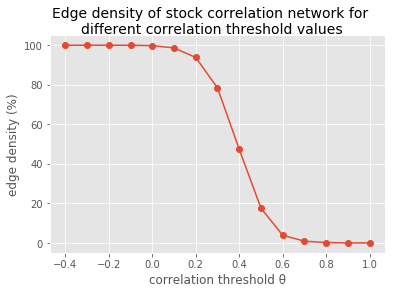

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in greater_equal
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in less
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


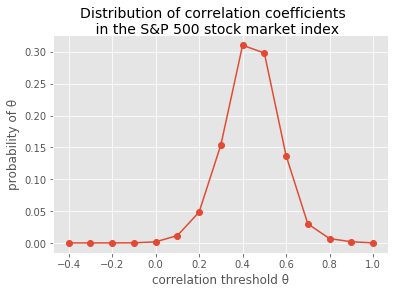

In [48]:
def count_network_edges(df):
    
    '''Counts number of edges in the network for different corrleation threshold values, plots edge density
    and correlation distributions'''
    
    thresholds = [-0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    num_edges = pd.DataFrame()
    
    corr_matrix = df.corr()
    
    # Create table of number of edges
    for value in thresholds:
        adj_matrix = np.where(corr_matrix > value, 1, 0)
        np.fill_diagonal(adj_matrix, 0)
        adj_matrix = pd.DataFrame(adj_matrix, columns=df.columns, index=df.columns)
        
        link_triangle = adj_matrix.where(np.triu(np.ones(adj_matrix.shape)).astype(np.bool))
        link_triangle.fillna(0, inplace=True)
        
        sum_edges = link_triangle[link_triangle==1].count().sum()
        num_edges[value] = [sum_edges]
    
    np.fill_diagonal(corr_matrix.values, np.nan)
    corr_triangle = np.array(corr_log_return.where(np.triu(np.ones(corr_log_return.shape)).astype(np.bool)))
    total_edges = np.count_nonzero(~np.isnan(corr_triangle))
    
    num_edges.rename(index ={0:'num_edges'}, inplace=True)
    num_edges = num_edges.T
    num_edges['difference'] = num_edges['num_edges'].shift()-num_edges['num_edges']
    num_edges['edge_density (%)'] = round((num_edges['num_edges']/total_edges)*100, 4)
    num_edges.fillna(0, inplace=True)
    num_edges.index.name = 'corr_threshold'
    
    # Plot edge density
    plt.plot(num_edges.index, num_edges['edge_density (%)'], '-o')
    plt.xlabel('correlation threshold θ')
    plt.ylabel('edge density (%)')
    plt.suptitle('Edge density of stock correlation network for \ndifferent correlation threshold values', fontsize=14)
    plt.savefig('edge_density_plot.png')
    plt.show()
    plt.close()
    
    
    # Create table of probability density
    all_probs = [0]
    
    for i in range(len(thresholds)):
        if thresholds[i] == thresholds[-1]:
            break
        over_thres = corr_triangle[np.where((corr_triangle >= thresholds[i]) & (corr_triangle < thresholds[i+1]))]
        count = len(over_thres)
        all_probs.append(count)
        
    
    prob_corr = pd.DataFrame(all_probs, columns=['count'], index=thresholds)
    prob_corr['probability'] = prob_corr['count']/total_edges
    prob_corr['cumulative_prob'] = ''
    prob_corr['cumulative_prob'].iloc[0] = prob_corr['probability'].iloc[0]
    prob_corr['cumulative_prob'] = pd.to_numeric(prob_corr['cumulative_prob'], errors='coerce')
    
    for i in range(len(prob_corr)):
        if i+1 != len(prob_corr):
            prob_corr['cumulative_prob'].iloc[i+1] = prob_corr['probability'].iloc[i+1] + prob_corr['cumulative_prob'].iloc[i]
   
    prob_corr['cumulative_prob'] = 1 - prob_corr['cumulative_prob']
    prob_corr.index.name = 'corr_threshold'

    
    # Plot probability distribution
    plt.plot(prob_corr.index, prob_corr['probability'], '-o')
    plt.xlabel('correlation threshold θ')
    plt.ylabel('probability of θ')
    plt.suptitle('Distribution of correlation coefficients \n in the S&P 500 stock market index', fontsize=14)
    plt.savefig('corr_coeff_distr.png')
    plt.show()
    plt.close()
               
    
    return num_edges, prob_corr


# Implementation
num_logret_edges, prob_logret_corr = count_network_edges(log_return_500)

In [21]:
# Inspect dataframe
num_logret_edges

num_edges  difference  edge_density (%)
corr_threshold                                         
-0.4               124750         0.0          100.0000
-0.3               124750         0.0          100.0000
-0.2               124745         5.0           99.9960
-0.1               124725        20.0           99.9800
 0.0               124510       215.0           99.8076
 0.1               123074      1436.0           98.6565
 0.2               117034      6040.0           93.8148
 0.3                97846     19188.0           78.4337
 0.4                59133     38713.0           47.4012
 0.5                21937     37196.0           17.5848
 0.6                 4827     17110.0            3.8693
 0.7                 1092      3735.0            0.8754
 0.8                  244       848.0            0.1956
 0.9                    9       235.0            0.0072
 1.0                    0         9.0            0.0000

In [22]:
# Inspect dataframe
prob_logret_corr

count  probability  cumulative_prob
corr_threshold                                     
-0.4                0     0.000000         1.000000
-0.3                0     0.000000         1.000000
-0.2                5     0.000040         0.999960
-0.1               20     0.000160         0.999800
 0.0              215     0.001723         0.998076
 0.1             1436     0.011511         0.986565
 0.2             6040     0.048417         0.938148
 0.3            19188     0.153812         0.784337
 0.4            38713     0.310325         0.474012
 0.5            37196     0.298164         0.175848
 0.6            17110     0.137154         0.038693
 0.7             3735     0.029940         0.008754
 0.8              848     0.006798         0.001956
 0.9              235     0.001884         0.000072
 1.0                9     0.000072         0.000000

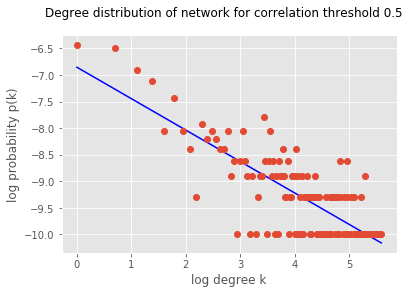

Number of nodes: 444 
Number of edges: 21937


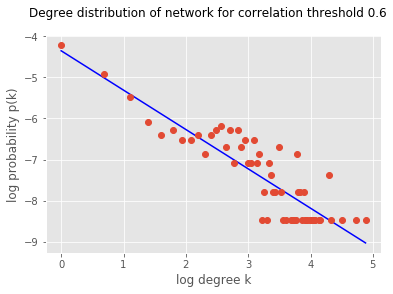

Number of nodes: 332 
Number of edges: 4827


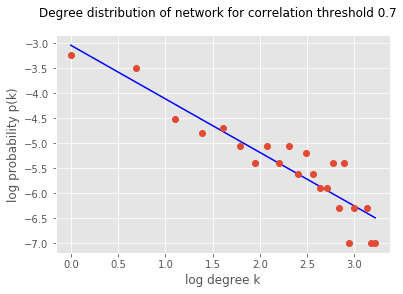

Number of nodes: 177 
Number of edges: 1092


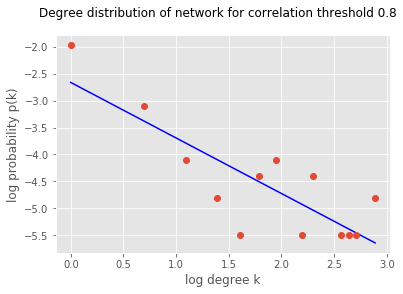

Number of nodes: 68 
Number of edges: 244


In [49]:
thres_list = [0.5, 0.6, 0.7, 0.8]

def graph_degree_distributions(df, thres_list):
    
    '''Graphs the log degree distributions of stock correlations above different correlation thresholds
    and finds the one that best follows the power law (shows a scale-free network)'''
    
    corr_matrix = df.corr()
    
    for threshold in thres_list:
        over_threshold = np.where(corr_matrix > threshold, 1, 0)
        np.fill_diagonal(over_threshold, 0)
        adj_matrix = pd.DataFrame(over_threshold, columns=corr_matrix.columns, index=corr_matrix.columns)

        links = adj_matrix.where(np.triu(np.ones(adj_matrix.shape)).astype(np.bool))
        links = links.stack().reset_index()
        links.columns = ['stock1', 'stock2','value']
        links['value'] = links['value'].astype(int)

        links_filtered = links.loc[(links['value'] == 1) & (links['stock1'] != links['stock2'])]
        link_list = links_filtered[links_filtered['value']==1].groupby('stock1').size()
        
        df_edges = pd.DataFrame(link_list, columns=['num_edges'])
        df_edges.index.name = 'stock'
        sum_edges = df_edges['num_edges'].sum()
        sum_nodes = len(links_filtered.groupby('stock1').size())
    
        edge_freq = df_edges.groupby('num_edges').size()
        df_degree = pd.DataFrame(edge_freq, columns=['frequency'])
        df_degree['degree_prob'] = df_degree['frequency']/sum_edges
        df_degree
        
        # Plot best-fit line
        par = np.polyfit(np.log(df_degree.index), np.log(df_degree['degree_prob']), 1, full=True)
        slope=par[0][0]
        intercept=par[0][1]
        xl = [min(np.log(df_degree.index)), max(np.log(df_degree.index))]
        yl = [slope*xx + intercept  for xx in xl]

        plt.plot(xl, yl, '-r', color='b')
        
        # Plot scatter points
        plt.plot(np.log(df_degree.index), np.log(df_degree['degree_prob']), 'o')
        plt.xlabel('log degree k')
        plt.ylabel('log probability p(k)')
        plt.suptitle('Degree distribution of network for correlation threshold '+str(threshold))
        plt.savefig('degree_distr_'+str(threshold)+'.png')
        plt.show()
        plt.close()
        print('Number of nodes:', len(df_edges), '\nNumber of edges:', sum_edges)
    
    return


# Implementation
graph_degree_distributions(log_return_500, thres_list)

In [36]:
def build_correlation_matrices(df, threshold):
    
    '''Creates correlation matrices for each year and the corresponding adjacency matrices with 
    1=high correlation and 0=low correlation, both stored in lists'''
    
    corr_ten_years, adj_ten_years = [], []
    for year in df:
        corr_matrix = year.corr()
        corr_ten_years.append(corr_matrix)   
        
        over_threshold = np.where(corr_matrix > threshold, 1, 0)
        np.fill_diagonal(over_threshold, 0)
        over_threshold = pd.DataFrame(over_threshold, columns=corr_matrix.columns, index=corr_matrix.columns)
        adj_ten_years.append(over_threshold)

    return corr_ten_years, adj_ten_years


# Implement for closing price, trading volume, price return
# Choose correlation coefficient 0.6 as it best follows the power law and has below 10% edge density
corr_price_years, adj_price_years = build_correlation_matrices(price_ten_years, 0.6)
corr_volume_years, adj_volume_years = build_correlation_matrices(price_ten_years, 0.6)
corr_return_years, adj_return_years = build_correlation_matrices(return_ten_years, 0.6)
corr_logret_years, adj_logret_years = build_correlation_matrices(logret_ten_years, 0.6)

print(len(corr_logret_years), len(adj_logret_years))
corr_logret_years[0]

10 10


A  AAL       AAP      AAPL  ABBV       ABC       ABT  \
A            1.000000  NaN  0.514179  0.610646   NaN  0.565554  0.526382   
AAL               NaN  NaN       NaN       NaN   NaN       NaN       NaN   
AAP          0.514179  NaN  1.000000  0.465176   NaN  0.527195  0.427452   
AAPL         0.610646  NaN  0.465176  1.000000   NaN  0.384076  0.415335   
ABBV              NaN  NaN       NaN       NaN   NaN       NaN       NaN   
ABC          0.565554  NaN  0.527195  0.384076   NaN  1.000000  0.621665   
ABT          0.526382  NaN  0.427452  0.415335   NaN  0.621665  1.000000   
ACN          0.678952  NaN  0.560506  0.552125   NaN  0.551569  0.536430   
ADBE         0.712205  NaN  0.570293  0.638452   NaN  0.556481  0.545149   
ADI               NaN  NaN       NaN       NaN   NaN       NaN       NaN   
ADM          0.604667  NaN  0.378631  0.516954   NaN  0.410217  0.422594   
ADP          0.635051  NaN  0.640591  0.580053   NaN  0.700899  0.554159   
ADS          0.595035  NaN  0.462108  0.493868   NaN  0.458001  0.444543   
ADSK         0.602277  NaN  0.495318  0.580639   NaN  0.459770  0.527599   
AEE          0.679105  NaN  0.492035  0.464974   NaN  0.653047  0.625916   
AEP          0.642142  NaN  0.505300  0.441378   NaN  0.609956  0.614613   
AES          0.556568  NaN  0.453865  0.380774   NaN  0.522435  0.481390   
AET          0.542248  NaN  0.466556  0.454591   NaN  0.581732  0.580083   
AFL          0.512588  NaN  0.372427  0.381947   NaN  0.359253  0.398481   
AGN          0.581257  NaN  0.527530  0.434431   NaN  0.565631  0.571484   
AIG          0.422069  NaN  0.323085  0.393091   NaN  0.338928  0.333652   
AIV          0.592095  NaN  0.602531  0.561190   NaN  0.427871  0.450195   
AIZ          0.542085  NaN  0.464520  0.421849   NaN  0.536578  0.477090   
AJG          0.301903  NaN  0.302356  0.335362   NaN  0.233360  0.319693   
AKAM         0.584852  NaN  0.485819  0.577885   NaN  0.377838  0.352017   
ALB          0.739654  NaN  0.561415  0.656216   NaN  0.537714  0.552954   
ALGN         0.518750  NaN  0.374510  0.423137   NaN  0.348232  0.367775   
ALK          0.423774  NaN  0.398122  0.456725   NaN  0.298627  0.335127   
ALL          0.572011  NaN  0.476804  0.456179   NaN  0.542929  0.504089   
ALLE              NaN  NaN       NaN       NaN   NaN       NaN       NaN   
ALXN         0.529816  NaN  0.411814  0.492416   NaN  0.421957  0.506392   
AMAT         0.601144  NaN  0.567065  0.558840   NaN  0.427170  0.396794   
AMD               NaN  NaN       NaN       NaN   NaN       NaN       NaN   
AME          0.716086  NaN  0.604928  0.635689   NaN  0.560687  0.519628   
AMG          0.597783  NaN  0.487041  0.583225   NaN  0.424577  0.474878   
AMGN         0.550751  NaN  0.412216  0.484153   NaN  0.519701  0.571588   
AMP          0.601927  NaN  0.572622  0.507045   NaN  0.522254  0.540380   
AMT          0.690469  NaN  0.555748  0.612770   NaN  0.504844  0.447663   
AMZN         0.631567  NaN  0.535361  0.639799   NaN  0.494270  0.428727   
ANDV         0.632299  NaN  0.470664  0.483191   NaN  0.521385  0.482209   
ANSS         0.603974  NaN  0.549139  0.629751   NaN  0.452477  0.463478   
ANTM         0.437752  NaN  0.410154  0.302797   NaN  0.508857  0.466518   
AON          0.437644  NaN  0.497936  0.432742   NaN  0.396054  0.428125   
AOS          0.621663  NaN  0.523735  0.577369   NaN  0.560167  0.496752   
APA          0.663735  NaN  0.463541  0.528718   NaN  0.482674  0.433808   
APC          0.671787  NaN  0.508279  0.546792   NaN  0.511617  0.465487   
APD          0.730202  NaN  0.560619  0.626298   NaN  0.521310  0.535062   
APH          0.714035  NaN  0.543698  0.568886   NaN  0.558018  0.510920   
APTV              NaN  NaN       NaN       NaN   NaN       NaN       NaN   
ARE          0.581952  NaN  0.512612  0.550240   NaN  0.439496  0.474974   
ARNC              NaN  NaN       NaN       NaN   NaN       NaN       NaN   
ATVI         0.532092  NaN  0.445486  0.579674   NaN  0.401139  0.43

In [37]:
def write_csv_files(matrix_list, measure):
    
    '''Save adjacency matrices as csv files in directory'''

    i = 1
    for matrix in matrix_list:
        matrix.to_csv('year'+str(i)+'_'+measure+'.csv')
        i += 1
    
    return


# Implement for closing price, trading volume, price return
write_csv_files(adj_price_years, 'price')
write_csv_files(adj_volume_years, 'volume')
write_csv_files(adj_return_years, 'return')
write_csv_files(adj_logret_years, 'logret')

## Hierarchical Clustering ##

In [42]:
# Set correlation matrix from a specific year
corr_matrix = corr_logret_years[0]
corr_matrix.dropna(axis=1, how='all', inplace=True)
corr_matrix.dropna(axis=0, how='all', inplace=True)
corr_matrix

A       AAP      AAPL       ABC       ABT       ACN  \
A            1.000000  0.514179  0.610646  0.565554  0.526382  0.678952   
AAP          0.514179  1.000000  0.465176  0.527195  0.427452  0.560506   
AAPL         0.610646  0.465176  1.000000  0.384076  0.415335  0.552125   
ABC          0.565554  0.527195  0.384076  1.000000  0.621665  0.551569   
ABT          0.526382  0.427452  0.415335  0.621665  1.000000  0.536430   
ACN          0.678952  0.560506  0.552125  0.551569  0.536430  1.000000   
ADBE         0.712205  0.570293  0.638452  0.556481  0.545149  0.618274   
ADM          0.604667  0.378631  0.516954  0.410217  0.422594  0.542270   
ADP          0.635051  0.640591  0.580053  0.700899  0.554159  0.709390   
ADS          0.595035  0.462108  0.493868  0.458001  0.444543  0.539601   
ADSK         0.602277  0.495318  0.580639  0.459770  0.527599  0.524207   
AEE          0.679105  0.492035  0.464974  0.653047  0.625916  0.614813   
AEP          0.642142  0.505300  0.441378  0.609956  0.614613  0.580265   
AES          0.556568  0.453865  0.380774  0.522435  0.481390  0.536334   
AET          0.542248  0.466556  0.454591  0.581732  0.580083  0.493923   
AFL          0.512588  0.372427  0.381947  0.359253  0.398481  0.463599   
AGN          0.581257  0.527530  0.434431  0.565631  0.571484  0.569469   
AIG          0.422069  0.323085  0.393091  0.338928  0.333652  0.399389   
AIV          0.592095  0.602531  0.561190  0.427871  0.450195  0.593146   
AIZ          0.542085  0.464520  0.421849  0.536578  0.477090  0.502976   
AJG          0.301903  0.302356  0.335362  0.233360  0.319693  0.245727   
AKAM         0.584852  0.485819  0.577885  0.377838  0.352017  0.507795   
ALB          0.739654  0.561415  0.656216  0.537714  0.552954  0.640866   
ALGN         0.518750  0.374510  0.423137  0.348232  0.367775  0.437371   
ALK          0.423774  0.398122  0.456725  0.298627  0.335127  0.356939   
ALL          0.572011  0.476804  0.456179  0.542929  0.504089  0.559013   
ALXN         0.529816  0.411814  0.492416  0.421957  0.506392  0.482848   
AMAT         0.601144  0.567065  0.558840  0.427170  0.396794  0.517080   
AME          0.716086  0.604928  0.635689  0.560687  0.519628  0.663214   
AMG          0.597783  0.487041  0.583225  0.424577  0.474878  0.538048   
AMGN         0.550751  0.412216  0.484153  0.519701  0.571588  0.496195   
AMP          0.601927  0.572622  0.507045  0.522254  0.540380  0.540243   
AMT          0.690469  0.555748  0.612770  0.504844  0.447663  0.614043   
AMZN         0.631567  0.535361  0.639799  0.494270  0.428727  0.561382   
ANDV         0.632299  0.470664  0.483191  0.521385  0.482209  0.557613   
ANSS         0.603974  0.549139  0.629751  0.452477  0.463478  0.585562   
ANTM         0.437752  0.410154  0.302797  0.508857  0.466518  0.384530   
AON          0.437644  0.497936  0.432742  0.396054  0.428125  0.491913   
AOS          0.621663  0.523735  0.577369  0.560167  0.496752  0.529956   
APA          0.663735  0.463541  0.528718  0.482674  0.433808  0.551387   
APC          0.671787  0.508279  0.546792  0.511617  0.465487  0.569927   
APD          0.730202  0.560619  0.626298  0.521310  0.535062  0.648918   
APH          0.714035  0.543698  0.568886  0.558018  0.510920  0.652850   
ARE          0.581952  0.512612  0.550240  0.439496  0.474974  0.543889   
ATVI         0.532092  0.445486  0.579674  0.401139  0.430568  0.513240   
AVB          0.612918  0.569849  0.589199  0.459861  0.499850  0.600425   
AVY          0.716961  0.626510  0.570274  0.628052  0.585663  0.648446   
AWK          0.473833  0.441295  0.321169  0.436723  0.401631  0.459144   
AXP          0.679664  0.496065  0.646998  0.504470  0.533111  0.631085   
AYI          0.617203  0.550650  0.628460  0.451646  0.421596  0.570003   
AZO          0.596110  0.687939  0.540210  0.540370  0.506120  0.614449   
BA           0.639678  0.493966  0.514424  0.526105  0.581887  0.572369   
BAC          0.512244  0.454784  0.519347  0.

In [43]:
# Compute distance matrix from correlation matrix
dist_matrix = np.sqrt(2*(1-corr_matrix))
dist_matrix

A       AAP      AAPL       ABC       ABT       ACN  \
A            0.000000  0.985719  0.882445  0.932144  0.973260  0.801309   
AAP          0.985719  0.000000  1.034238  0.972425  1.070092  0.937543   
AAPL         0.882445  1.034238  0.000000  1.109887  1.081355  0.946441   
ABC          0.932144  0.972425  1.109887  0.000000  0.869867  0.947028   
ABT          0.973260  1.070092  1.081355  0.869867  0.000000  0.962882   
ACN          0.801309  0.937543  0.946441  0.947028  0.962882  0.000000   
ADBE         0.758676  0.927046  0.850350  0.941827  0.953783  0.873757   
ADM          0.889194  1.114781  0.982900  1.086078  1.074622  0.956797   
ADP          0.854341  0.847831  0.916458  0.773435  0.944289  0.762377   
ADS          0.899962  1.037200  1.006113  1.041152  1.053999  0.959582   
ADSK         0.891878  1.004671  0.915817  1.039452  0.972009  0.975493   
AEE          0.801118  1.007934  1.034433  0.833011  0.864967  0.877710   
AEP          0.846000  0.994686  1.056998  0.883226  0.877938  0.916226   
AES          0.941735  1.045117  1.112858  0.977308  1.018440  0.962981   
AET          0.956819  1.032903  1.044422  0.914623  0.916425  1.006058   
AFL          0.987331  1.120333  1.111803  1.132031  1.096831  1.035762   
AGN          0.915143  0.972080  1.063550  0.932061  0.925761  0.927934   
AIG          1.075110  1.163542  1.101734  1.149846  1.154424  1.096003   
AIV          0.903223  0.891593  0.936814  1.069700  1.048623  0.902058   
AIZ          0.956991  1.034872  1.075315  0.962727  1.022653  0.997019   
AJG          1.181607  1.181223  1.152943  1.238257  1.166454  1.228228   
AKAM         0.911206  1.014082  0.918819  1.115493  1.138405  0.992174   
ALB          0.721590  0.936573  0.829197  0.961546  0.945564  0.847507   
ALGN         0.981071  1.118472  1.074116  1.141725  1.124477  1.060781   
ALK          1.073523  1.097158  1.042378  1.184376  1.153146  1.134073   
ALL          0.925191  1.022933  1.042900  0.956108  0.995903  0.939135   
ALXN         0.969726  1.084607  1.007555  1.075214  0.993587  1.017007   
AMAT         0.893147  0.930521  0.939319  1.070355  1.098368  0.982772   
AME          0.753543  0.888900  0.853594  0.937350  0.980175  0.820715   
AMG          0.896902  1.012876  0.912990  1.072775  1.024814  0.961199   
AMGN         0.947892  1.084236  1.015723  0.980101  0.925648  1.003797   
AMP          0.892270  0.924530  0.992930  0.977493  0.958770  0.958913   
AMT          0.786804  0.942605  0.880034  0.995144  1.051035  0.878587   
AMZN         0.858409  0.963991  0.848765  1.005714  1.068900  0.936609   
ANDV         0.857555  1.028917  1.016670  0.978381  1.017636  0.940624   
ANSS         0.889973  0.949591  0.860522  1.046445  1.035878  0.910426   
ANTM         1.060422  1.086136  1.180849  0.991104  1.032940  1.109477   
AON          1.060524  1.002062  1.065136  1.099041  1.069462  1.008054   
AOS          0.869870  0.975977  0.919381  0.937905  1.003243  0.969582   
APA          0.820080  1.035817  0.970858  1.017178  1.064135  0.947220   
APC          0.810202  0.991687  0.952059  0.988315  1.033937  0.927441   
APD          0.734572  0.937423  0.864525  0.978458  0.964301  0.837952   
APH          0.756260  0.955303  0.928562  0.940194  0.989020  0.833247   
ARE          0.914383  0.987307  0.948430  1.058776  1.024720  0.955103   
ATVI         0.967376  1.053104  0.916871  1.094405  1.067175  0.986671   
AVB          0.879866  0.927525  0.906423  1.039364  1.000150  0.893952   
AVY          0.752381  0.864280  0.927067  0.862495  0.910315  0.838515   
AWK          1.025834  1.057077  1.165187  1.061392  1.093955  1.040054   
AXP          0.800420  1.003928  0.840240  0.995520  0.966322  0.858970   
AYI          0.874983  0.947997  0.862021  1.047238  1.075551  0.927359   
AZO          0.898766  0.790014  0.958947  0.958781  0.993861  0.878124   
BA           0.848908  1.006016  0.985470  0.973546  0.914454  0.924803   
BAC          0.987680  1.044238  0.980462  1.

In [44]:
# Convert distance matrix into an array using only the upper triangle values
dist_array = np.array(dist_matrix)
dist_array_upper = np.triu(dist_array, k=1)
dist_array_upper

array([[0.        , 0.9857186 , 0.88244454, ..., 0.83362205, 0.91041568,
        1.07458774],
       [0.        , 0.        , 1.03423789, ..., 0.97818327, 0.97150573,
        1.13507125],
       [0.        , 0.        , 0.        , ..., 0.95202692, 1.08085431,
        1.06912766],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99492295,
        1.03604859],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.16402929],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

433


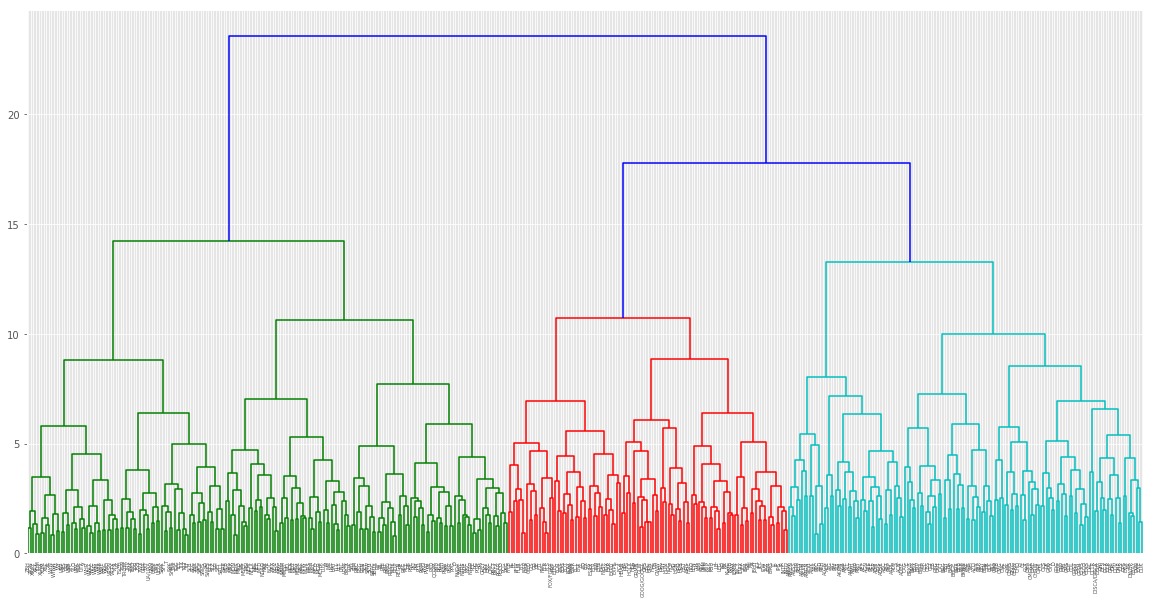

In [50]:
# Visualize dendrogram of hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(dist_array_upper, method='complete', metric='euclidean')
print(len(Z))

labels = dist_matrix.index
fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z, labels=labels)
plt.show()

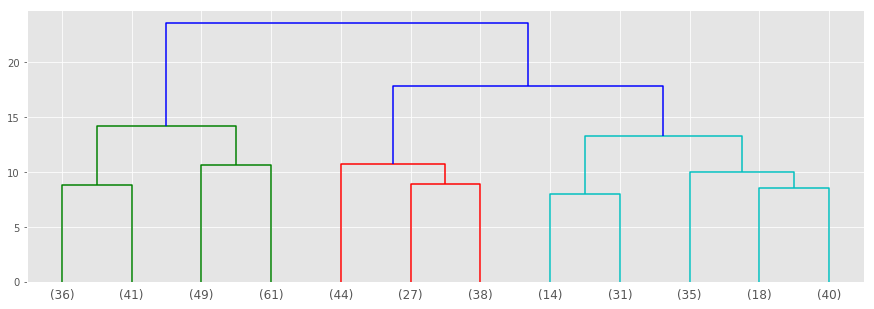

In [46]:
# Show only the last p merged clusters
fig = plt.figure(figsize=(15, 5))
dn = dendrogram(Z, truncate_mode='lastp', p=12)
plt.show()

433


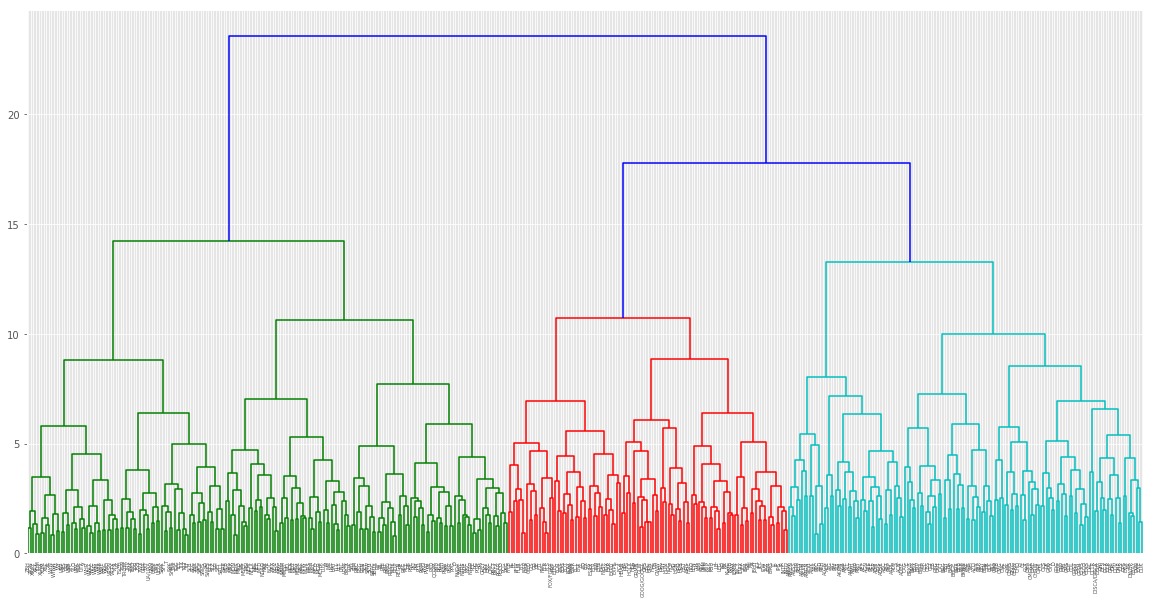

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:704: RuntimeWarning: invalid value encountered in greater_equal
  if np.all(y >= 0) and np.allclose(y, y.T):


clustering not possible: (<class 'ValueError'>, ValueError('The condensed distance matrix must contain only finite values.',), <traceback object at 0x143aff308>)
448


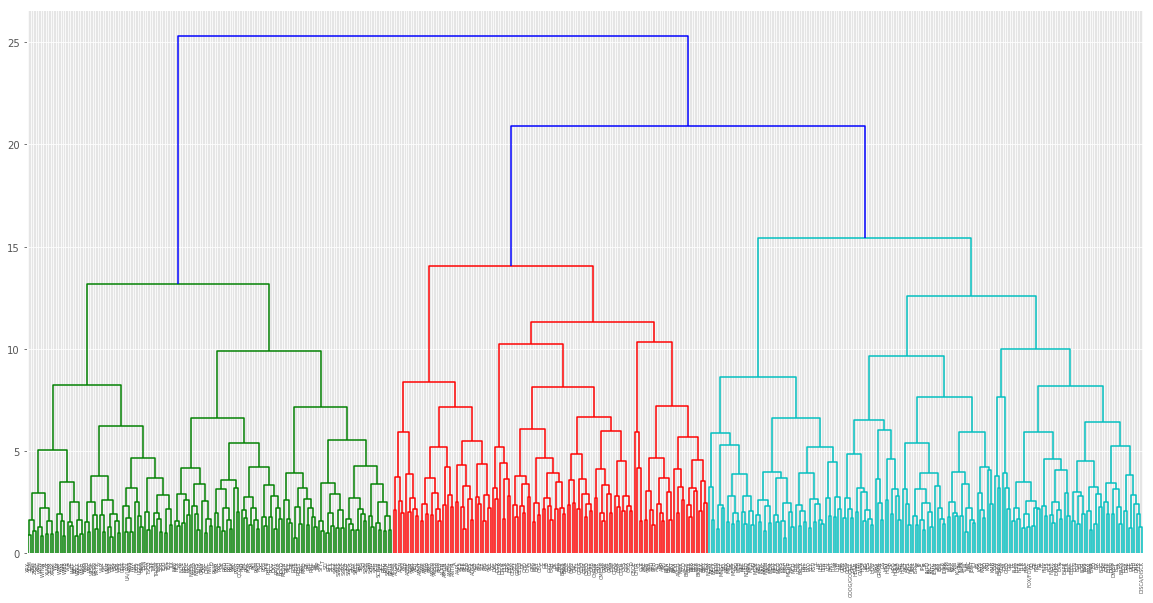

458


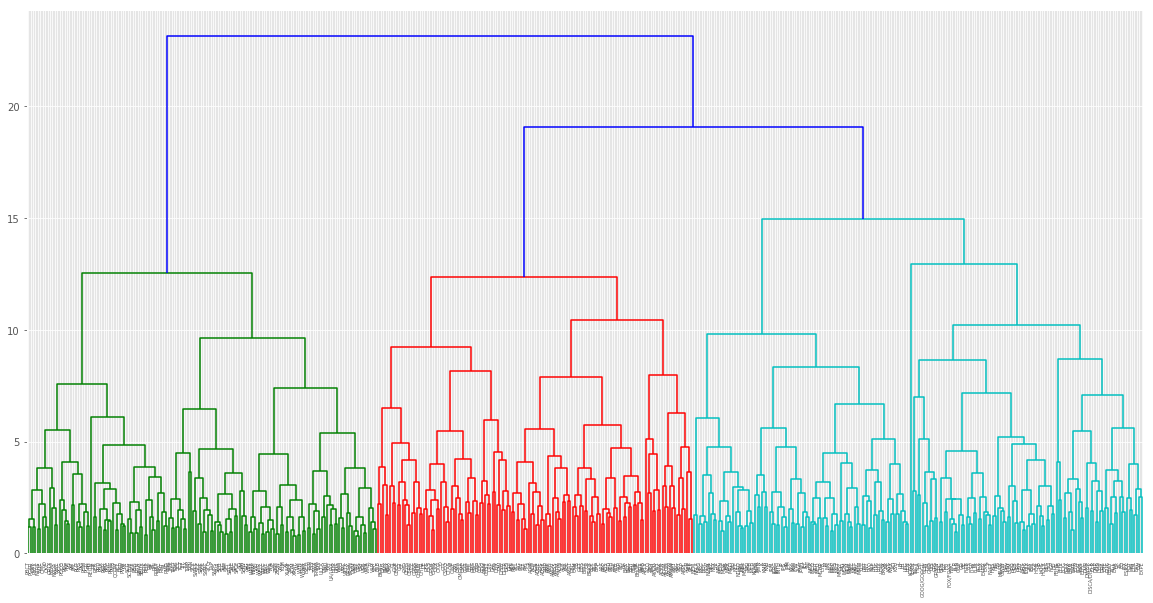

466


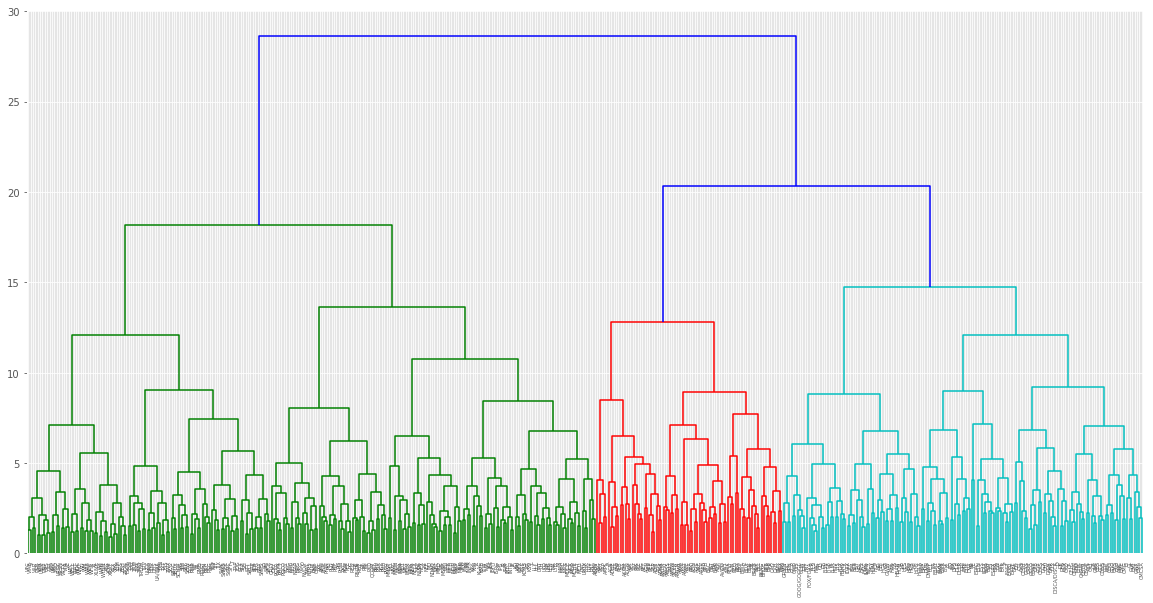

475


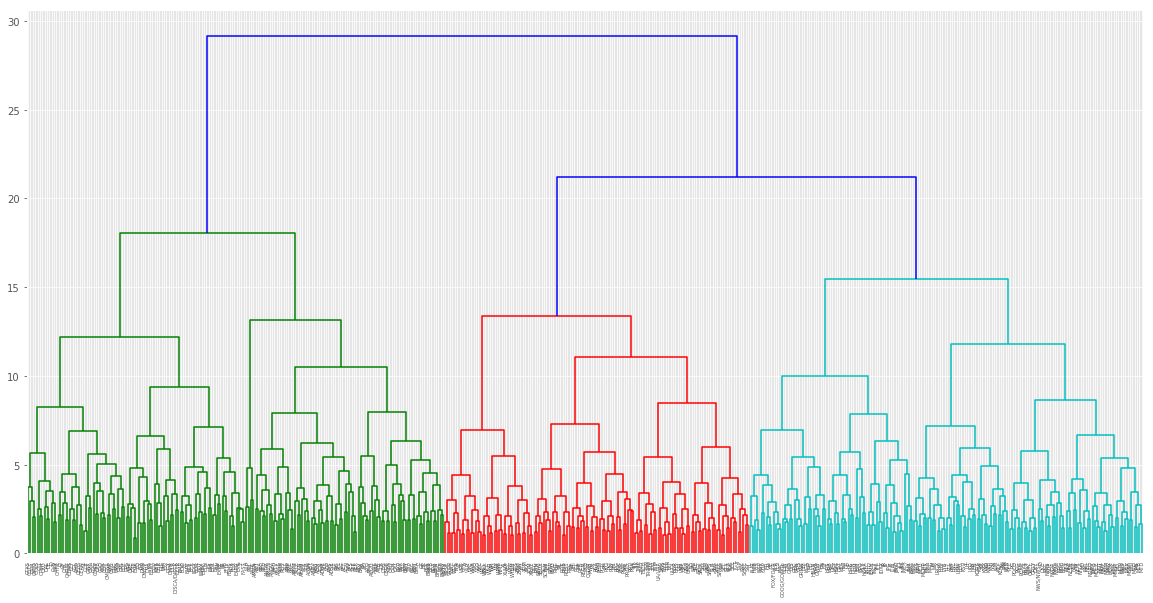

482


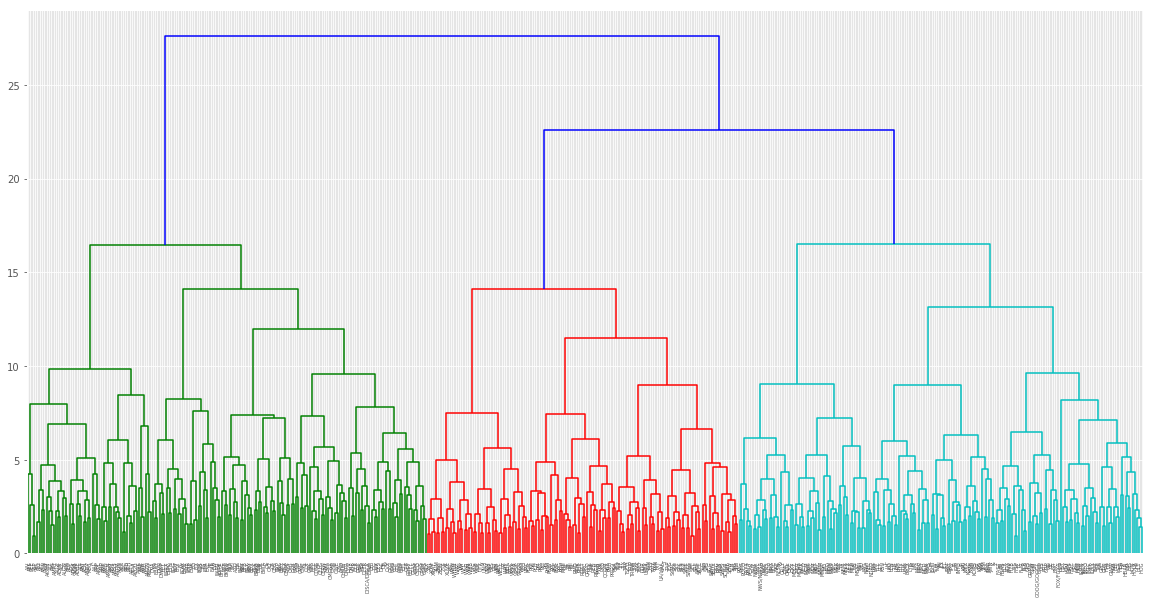

489


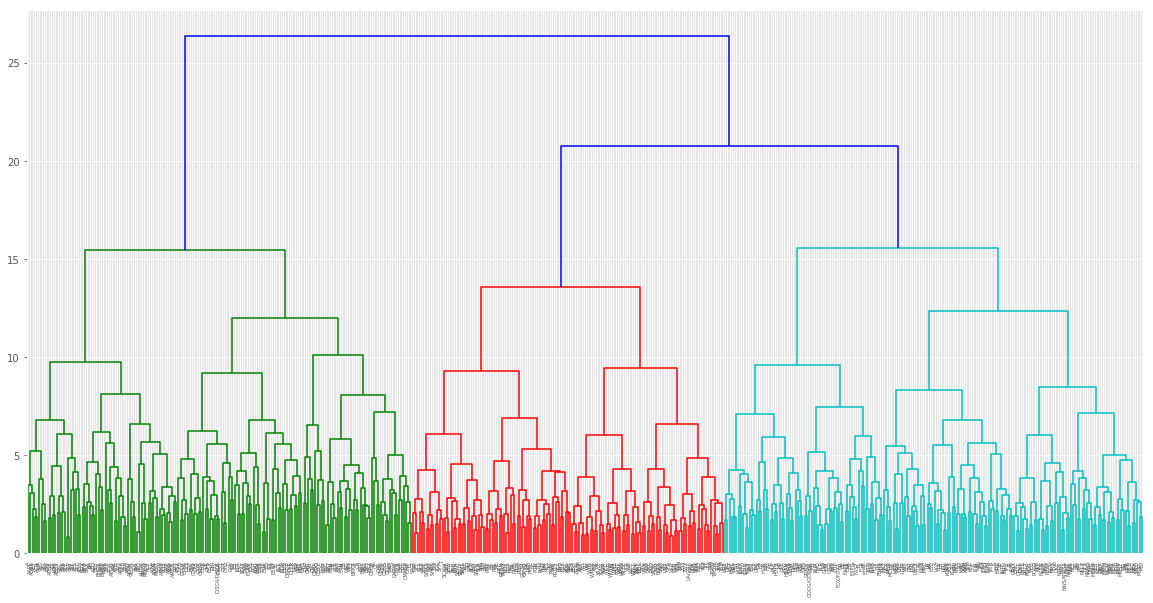

493


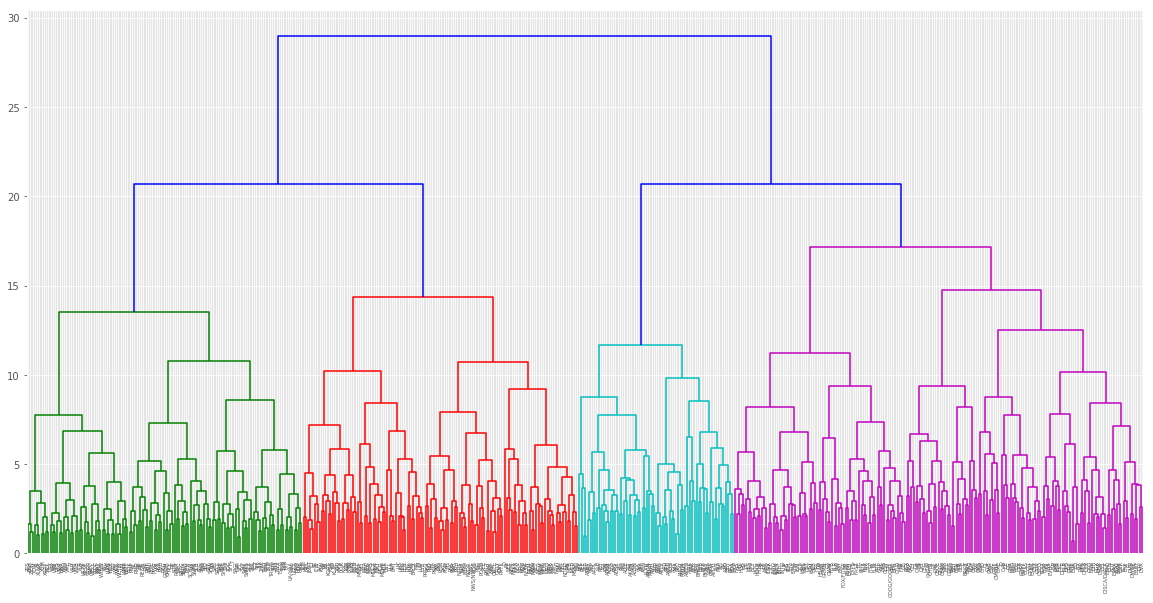

499


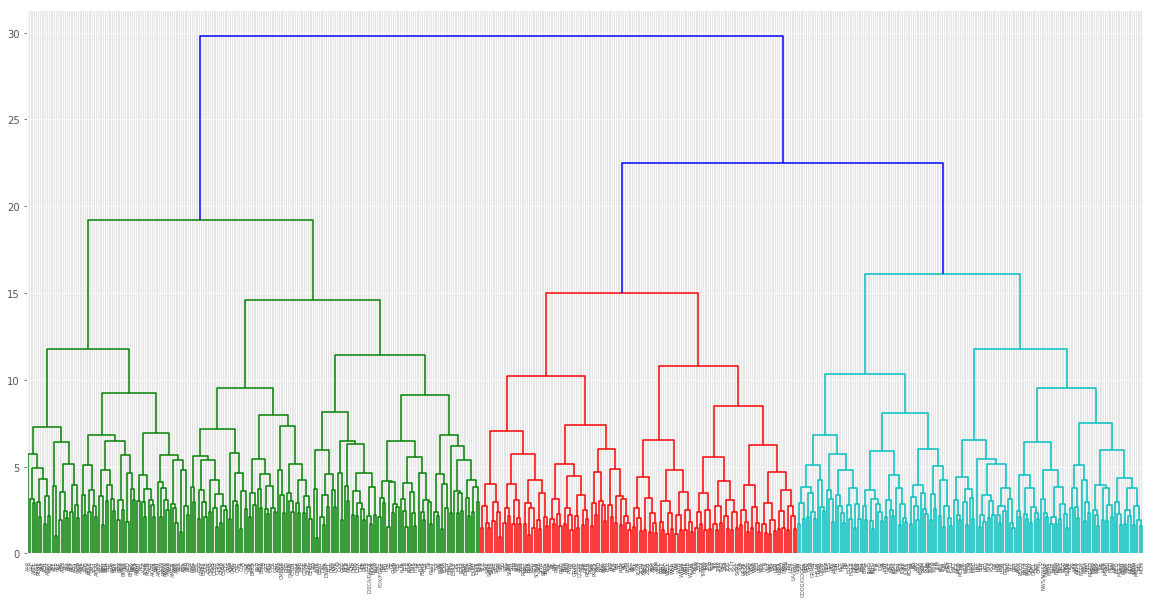

In [51]:
def create_clustering_dendrograms(corr_matrix):
    
    '''Computes distance matrix from correlation matrix of each year to create hierarchical clustering 
    dendrograms using complete linkage'''
    
    i = 1
    for matrix in corr_matrix:
        matrix.dropna(axis=1, how='all', inplace=True)
        matrix.dropna(axis=0, how='all', inplace=True)
        dist_matrix = np.sqrt(2*(1-matrix))
        np.fill_diagonal(dist_matrix.values, 0)

        dist_array = np.array(dist_matrix)
        dist_array_upper = np.triu(dist_array, k=1)
        
        try:
            Z = linkage(dist_array_upper, method='complete', metric='euclidean')
            print(len(Z))
            labels = dist_matrix.index
            fig = plt.figure(figsize=(20, 10))
            dn = dendrogram(Z, labels=labels)
            plt.savefig('year'+str(i)+'_dendrogram.png')
            plt.show()
            plt.close()
        
        # Error is raised for year 2, can't do hierarchical clustering
        except:
            exc_info = sys.exc_info()
            print('clustering not possible:', exc_info)
        
        i += 1
        
    return
    
    
# Implementation
create_clustering_dendrograms(corr_logret_years)